<a href="https://colab.research.google.com/github/kafi015/data_analysis/blob/main/Version_01_In_Hospital_Mortality_Prediction_Using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 100)


# Machine Learning
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import f1_score, roc_auc_score, precision_score, accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
#from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_curve, auc
from sklearn.impute import SimpleImputer, KNNImputer
#import optuna
METRIC = f1_score
metric = 'f1_macro'

# METRIC = f1_score
# metric = 'f1'


# Classifiers
from lightgbm import LGBMClassifier
#from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

import os
for dirname, _, filenames in os.walk('data01'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
df = pd.read_csv("/content/data01.csv")
df

,group,ID,outcome,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,deficiencyanemias,depression,Hyperlipemia,Renal failure,COPD,heart rate,Systolic blood pressure,Diastolic blood pressure,Respiratory rate,temperature,SP O2,Urine output,hematocrit,RBC,MCH,MCHC,MCV,RDW,Leucocyte,Platelets,Neutrophils,Basophils,Lymphocyte,PT,INR,NT-proBNP,Creatine kinase,Creatinine,Urea nitrogen,glucose,Blood potassium,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
0,1,125047,0.0,72,1,37.588179,0,0,0,1,1,0,1,1,0,68.837838,155.866667,68.333333,16.621622,36.714286,98.394737,2155.0,26.272727,2.960000,28.250000,31.520000,89.900000,16.220000,7.650000,305.100000,74.65,0.40,13.30,10.600000,1.000000,1956.0,148.000000,1.958333,50.000000,114.636364,4.816667,138.750000,7.463636,109.166667,13.166667,2.618182,7.230,21.166667,0.5,40.0,55
1,1,139812,0.0,75,2,NaN,0,0,0,0,1,0,0,0,1,101.370370,140.000000,65.000000,20.851852,36.682540,96.923077,1425.0,30.780000,3.138000,31.060000,31.660000,98.200000,14.260000,12.740000,246.400000,NaN,NaN,NaN,NaN,NaN,2384.0,60.600000,1.122222,20.333333,147.500000,4.450000,138.888889,8.162500,98.444444,11.444444,1.887500,7.225,33.444444,0.5,78.0,55
2,1,109787,0.0,83,2,26.572634,0,0,0,0,1,0,0,1,0,72.318182,135.333333,61.375000,23.640000,36.453704,95.291667,2425.0,27.700000,2.620000,34.320000,31.300000,109.800000,23.820000,5.480000,204.200000,68.10,0.55,24.50,11.275000,0.950000,4081.0,16.000000,1.871429,33.857143,149.000000,5.825000,140.714286,8.266667,105.857143,10.000000,2.157143,7.268,30.571429,0.5,71.5,35
3,1,130587,0.0,43,2,83.264629,0,0,0,0,0,0,0,0,0,94.500000,126.400000,73.200000,21.857143,36.287037,93.846154,8760.0,36.637500,4.277500,26.062500,30.412500,85.625000,17.037500,8.225000,216.375000,81.80,0.15,14.50,27.066667,2.666667,668.0,85.000000,0.585714,15.285714,128.250000,4.386667,138.500000,9.476923,92.071429,12.357143,1.942857,7.370,38.571429,0.6,75.0,55
4,1,138290,0.0,75,2,31.824842,1,0,0,0,1,0,0,1,1,67.920000,156.560000,58.120000,21.360000,36.761905,99.280000,4455.0,29.933333,3.286667,30.666667,33.666667,91.000000,16.266667,8.833333,251.000000,NaN,NaN,NaN,NaN,NaN,30802.0,111.666667,1.950000,43.000000,145.750000,4.783333,136.666667,8.733333,104.500000,15.166667,1.650000,7.250,22.000000,0.6,50.0,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1172,2,171130,0.0,62,1,25.516870,1,1,0,1,0,1,1,1,0,100.125000,142.545455,69.681818,24.500000,37.055556,94.130435,NaN,33.628571,3.685714,27.842857,30.542857,91.142857,15.557143,7.742857,251.857143,81.55,0.70,10.65,12.600000,1.200000,47985.0,129.500000,8.385714,48.000000,120.000000,5.557143,136.714286,10.271429,94.428571,20.142857,2.714286,NaN,27.714286,NaN,NaN,40
1173,2,101659,0.0,78,1,25.822710,0,1,0,1,0,1,1,1,0,114.640000,101.222222,51.888889,18.958333,35.972222,93.526316,NaN,28.715789,3.270000,29.772727,33.263636,89.545455,18.672727,22.309091,283.000000,84.58,0.80,7.70,18.721429,1.692857,48044.0,34.000000,1.900000,34.500000,138.333333,4.520000,135.680000,10.523529,101.720000,18.160000,2.012500,NaN,20.480000,NaN,NaN,30
1174,2,162069,0.0,85,2,23.891779,1,1,0,1,1,0,0,1,0,52.720000,137.791667,40.958333,18.680000,36.777778,98.800000,118.0,27.685714,3.065714,26.900000,29.800000,90.285714,17.285714,9.228571,409.285714,65.90,0.40,24.40,13.000000,1.100000,50976.0,98.000000,2.728571,30.428571,99.000000,4.100000,136.000000,8.466667,97.285714,14.000000,2.028571,NaN,28.857143,NaN,NaN,55
1175,2,120967,0.0,79,2,35.288554,0,0,1,1,1,1,1,1,0,93.400000,94.416667,62.458333,22.040000,36.422222,99.560000,2585.0,33.537500,3.446250,31.150000,32.012500,97.375000,16.000000,6.062500,307.375000,79.85,0.30,13.20,16.442857,1.485714,59701.0,24.333333,1.736364,35.500000,135.166667,4.091667,140.000000,8.183333,104.000000,15.750000,2.090000,NaN,24.375000,NaN,NaN,25


In [ ]:
df.shape

(1177, 51)

In [ ]:
df.describe().style.background_gradient(cmap = 'PuBu')

,group,ID,outcome,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,deficiencyanemias,depression,Hyperlipemia,Renal failure,COPD,heart rate,Systolic blood pressure,Diastolic blood pressure,Respiratory rate,temperature,SP O2,Urine output,hematocrit,RBC,MCH,MCHC,MCV,RDW,Leucocyte,Platelets,Neutrophils,Basophils,Lymphocyte,PT,INR,NT-proBNP,Creatine kinase,Creatinine,Urea nitrogen,glucose,Blood potassium,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
count,1177.000000,1177.000000,1176.000000,1177.000000,1177.000000,962.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1164.000000,1161.000000,1161.000000,1164.000000,1158.000000,1164.000000,1141.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1177.000000,1033.000000,918.000000,1032.000000,1157.000000,1157.000000,1177.000000,1012.000000,1177.000000,1177.000000,1159.000000,1177.000000,1177.000000,1176.000000,1177.000000,1177.000000,1177.000000,885.000000,1177.000000,948.000000,883.000000,1177.000000
mean,1.299065,150778.120646,0.135204,74.055225,1.525064,30.188278,0.717927,0.451147,0.085811,0.421410,0.338997,0.118946,0.379779,0.365336,0.075616,84.575848,117.995035,59.534497,20.801511,36.677286,96.272900,1899.276512,31.914014,3.575010,29.539939,32.864327,89.903812,15.952129,10.712948,241.504323,80.113544,0.405569,12.233024,17.481057,1.625465,11014.130912,246.778456,1.642846,36.298423,148.796531,4.176646,138.890016,8.500894,102.283835,13.925094,2.120169,7.378532,26.911766,1.853426,45.535382,48.715378
std,0.458043,29034.669513,0.342087,13.434061,0.499584,9.325997,0.450200,0.497819,0.280204,0.493995,0.473570,0.323863,0.485538,0.481729,0.264495,16.018701,17.367618,10.684681,4.002987,0.607558,2.298002,1272.363631,5.202102,0.626835,2.619054,1.402302,6.532629,2.131643,5.229402,113.120623,11.133243,0.465007,8.632807,7.386988,0.834038,13148.664625,1484.522810,1.279651,21.851545,51.494256,0.414836,4.151347,0.572263,5.339733,2.652732,0.251532,0.067320,5.167512,0.983819,12.711271,12.868436
min,1.000000,100213.000000,0.000000,19.000000,1.000000,13.346801,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,36.000000,75.000000,24.736842,11.137931,33.250000,75.916667,0.000000,20.311111,2.030000,18.125000,27.825000,62.600000,12.088889,0.100000,9.571429,5.000000,0.100000,0.966667,10.100000,0.871429,50.000000,8.000000,0.266667,5.357143,66.666667,3.000000,114.666667,6.700000,80.266667,6.636364,1.400000,7.090000,12.857143,0.500000,18.750000,15.000000
25%,1.000000,125603.000000,0.000000,65.000000,1.000000,24.326461,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,72.371250,105.391304,52.173913,17.925694,36.286045,95.000000,980.000000,28.160000,3.120000,28.250000,32.011111,86.250000,14.460000,7.440000,168.909091,74.775000,0.200000,6.650000,13.160000,1.140000,2251.000000,46.000000,0.940000,20.833333,113.937500,3.900000,136.666667,8.148864,99.000000,12.250000,1.955556,7.334615,23.454545,1.200000,37.038462,40.000000
50%,1.000000,151901.000000,0.000000,77.000000,2.000000,28.312474,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,83.610799,116.128205,58.461538,20.372308,36.650794,96.452273,1675.000000,30.800000,3.490000,29.750000,32.985714,90.000000,15.506250,9.680000,222.666667,82.466667,0.300000,10.475000,14.633333,1.300000,5840.000000,89.250000,1.287500,30.666667,136.400000,4.115385,139.250000,8.500000,102.500000,13.666667,2.092308,7.380000,26.500000,1.600000,43.000000,55.000000
75%,2.000000,176048.000000,0.000000,85.000000,2.000000,33.633509,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,95.907143,128.625000,65.464286,23.391200,37.021991,97.917500,2500.000000,35.012500,3.900000,31.240000,33.825000,93.857143,16.937500,12.740000,304.250000,87.450000,0.500000,15.462500,18.800000,1.736364,14968.000000,185.187500,1

In [ ]:
df.isnull().sum()

group                         0
ID                            0
outcome                       1
age                           0
gendera                       0
BMI                         215
hypertensive                  0
atrialfibrillation            0
CHD with no MI                0
diabetes                      0
deficiencyanemias             0
depression                    0
Hyperlipemia                  0
Renal failure                 0
COPD                          0
heart rate                   13
Systolic blood pressure      16
Diastolic blood pressure     16
Respiratory rate             13
temperature                  19
SP O2                        13
Urine output                 36
hematocrit                    0
RBC                           0
MCH                           0
MCHC                          0
MCV                           0
RDW                           0
Leucocyte                     0
Platelets                     0
Neutrophils                 144
Basophil

In [ ]:
# Removing Duplicates
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(1177, 51)

# Data Preprocessing



In [ ]:
# missing = ['outcome', 'BMI', 'heart rate',
#        'Systolic blood pressure', 'Diastolic blood pressure',
#        'Respiratory rate', 'temperature', 'SP O2', 'Urine output',
#        'Neutrophils', 'Basophils', 'Lymphocyte', 'PT', 'INR',
#        'Creatine kinase','glucose', 'Blood calcium',
#        'PH', 'Lactic acid', 'PCO2']
# df.isnull().sum()
missing_values = df.isna().sum().to_dict()

In [ ]:
keys = ['outcome', 'BMI', 'heart rate',
       'Systolic blood pressure', 'Diastolic blood pressure',
       'Respiratory rate', 'temperature', 'SP O2', 'Urine output',
       'Neutrophils', 'Basophils', 'Lymphocyte', 'PT', 'INR',
       'Creatine kinase','glucose', 'Blood calcium',
       'PH', 'Lactic acid', 'PCO2']
missing = {x:missing_values[x] for x in keys}

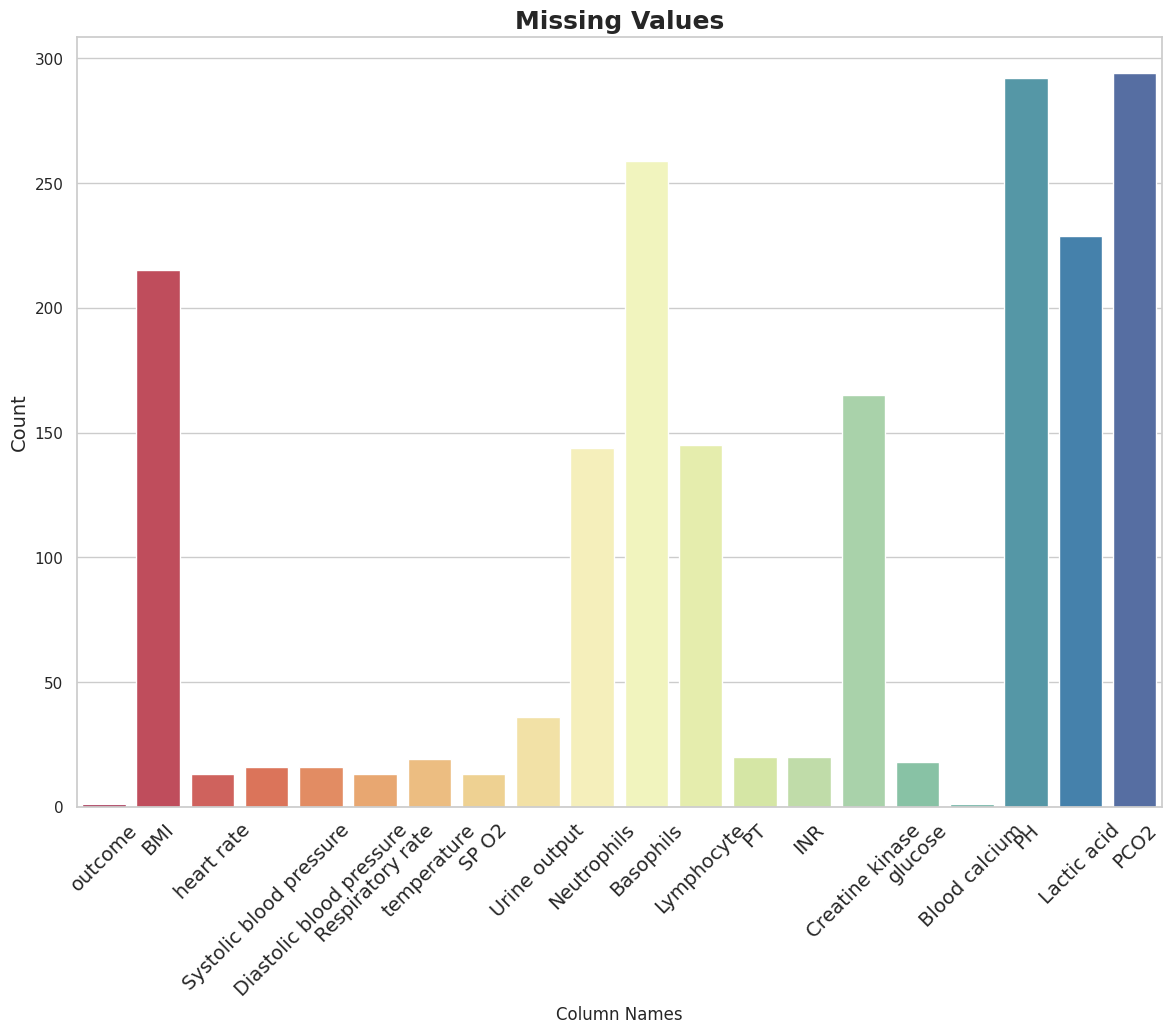

In [ ]:
missing_values_df = pd.DataFrame(list(missing.items()), columns=['Column Names', 'Missing_Values'])
# fig = px.bar(missing_values_df, x = 'Column Names', y = 'Missing_Values', title = 'Missing Values')
# fig.show()
plt.figure(figsize = (14, 10))
sns.barplot(x = "Column Names", y = "Missing_Values", data = missing_values_df, palette = "Spectral")
plt.title("Missing Values", fontsize = 18, weight = "bold")
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, fontsize = 14)
plt.show()

In [ ]:
# X = all columns except outcome
# y = outcome

y = df[['outcome']]
X = df.drop(columns = ['outcome'])

In [ ]:
# imputerX = SimpleImputer(missing_values=np.nan, strategy='mean')
imputerX = KNNImputer(missing_values=np.nan, n_neighbors = 5)
cols = X.select_dtypes(include='float64').columns

cols #36 column

Index(['BMI', 'heart rate', 'Systolic blood pressure',
       'Diastolic blood pressure', 'Respiratory rate', 'temperature', 'SP O2',
       'Urine output', 'hematocrit', 'RBC', 'MCH', 'MCHC', 'MCV', 'RDW',
       'Leucocyte', 'Platelets', 'Neutrophils', 'Basophils', 'Lymphocyte',
       'PT', 'INR', 'NT-proBNP', 'Creatine kinase', 'Creatinine',
       'Urea nitrogen', 'glucose', 'Blood potassium', 'Blood sodium',
       'Blood calcium', 'Chloride', 'Anion gap', 'Magnesium ion', 'PH',
       'Bicarbonate', 'Lactic acid', 'PCO2'],
      dtype='object')

In [ ]:
imputerX.fit(X[cols])

KNNImputer()

In [ ]:
X[cols] = imputerX.transform(X[cols])
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1177 entries, 0 to 1176
Data columns (total 50 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   group                     1177 non-null   int64  
 1   ID                        1177 non-null   int64  
 2   age                       1177 non-null   int64  
 3   gendera                   1177 non-null   int64  
 4   BMI                       1177 non-null   float64
 5   hypertensive              1177 non-null   int64  
 6   atrialfibrillation        1177 non-null   int64  
 7   CHD with no MI            1177 non-null   int64  
 8   diabetes                  1177 non-null   int64  
 9   deficiencyanemias         1177 non-null   int64  
 10  depression                1177 non-null   int64  
 11  Hyperlipemia              1177 non-null   int64  
 12  Renal failure             1177 non-null   int64  
 13  COPD                      1177 non-null   int64  
 14  heart ra

In [ ]:
# Imputing y with most frequent value
imputer_y = SimpleImputer(strategy = "most_frequent")
imputer_y.fit(y)
y = imputer_y.transform(y)
y

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [ ]:
y = pd.DataFrame(y, columns=['outcome'], dtype='int64')
y

,outcome
0,0
1,0
2,0
3,0
4,0
...,...
1172,0
1173,0
1174,0
1175,0


In [ ]:
df_final = X.copy()
df_final['outcome'] = y
df_final.head()

,group,ID,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,deficiencyanemias,depression,Hyperlipemia,Renal failure,COPD,heart rate,Systolic blood pressure,Diastolic blood pressure,Respiratory rate,temperature,SP O2,Urine output,hematocrit,RBC,MCH,MCHC,MCV,RDW,Leucocyte,Platelets,Neutrophils,Basophils,Lymphocyte,PT,INR,NT-proBNP,Creatine kinase,Creatinine,Urea nitrogen,glucose,Blood potassium,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF,outcome
0,1,125047,72,1,37.588179,0,0,0,1,1,0,1,1,0,68.837838,155.866667,68.333333,16.621622,36.714286,98.394737,2155.0,26.272727,2.960000,28.250000,31.520000,89.900,16.220000,7.650000,305.100,74.650,0.40,13.300000,10.600000,1.000000,1956.0,148.000000,1.958333,50.000000,114.636364,4.816667,138.750000,7.463636,109.166667,13.166667,2.618182,7.230,21.166667,0.5,40.0,55,0
1,1,139812,75,2,30.324638,0,0,0,0,1,0,0,0,1,101.370370,140.000000,65.000000,20.851852,36.682540,96.923077,1425.0,30.780000,3.138000,31.060000,31.660000,98.200,14.260000,12.740000,246.400,80.800,0.35,11.866667,13.925238,1.228571,2384.0,60.600000,1.122222,20.333333,147.500000,4.450000,138.888889,8.162500,98.444444,11.444444,1.887500,7.225,33.444444,0.5,78.0,55,0
2,1,109787,83,2,26.572634,0,0,0,0,1,0,0,1,0,72.318182,135.333333,61.375000,23.640000,36.453704,95.291667,2425.0,27.700000,2.620000,34.320000,31.300000,109.800,23.820000,5.480000,204.200,68.100,0.55,24.500000,11.275000,0.950000,4081.0,16.000000,1.871429,33.857143,149.000000,5.825000,140.714286,8.266667,105.857143,10.000000,2.157143,7.268,30.571429,0.5,71.5,35,0
3,1,130587,43,2,83.264629,0,0,0,0,0,0,0,0,0,94.500000,126.400000,73.200000,21.857143,36.287037,93.846154,8760.0,36.637500,4.277500,26.062500,30.412500,85.625,17.037500,8.225000,216.375,81.800,0.15,14.500000,27.066667,2.666667,668.0,85.000000,0.585714,15.285714,128.250000,4.386667,138.500000,9.476923,92.071429,12.357143,1.942857,7.370,38.571429,0.6,75.0,55,0
4,1,138290,75,2,31.824842,1,0,0,0,1,0,0,1,1,67.920000,156.560000,58.120000,21.360000,36.761905,99.280000,4455.0,29.933333,3.286667,30.666667,33.666667,91.000,16.266667,8.833333,251.000,84.342,0.20,9.490000,16.299026,1.496818,30802.0,111.666667,1.950000,43.000000,145.750000,4.783333,136.666667,8.733333,104.500000,15.166667,1.650000,7.250,22.000000,0.6,50.0,55,0


In [ ]:
df_final.shape

(1177, 51)

In [ ]:
# Changing gendera to gender
df_final.rename(columns = {
    'gendera':'gender',
    'Hyperlipemia':'hyperlipidemia'
},
          inplace = True)

In [ ]:
df_final.columns

Index(['group', 'ID', 'age', 'gender', 'BMI', 'hypertensive',
       'atrialfibrillation', 'CHD with no MI', 'diabetes', 'deficiencyanemias',
       'depression', 'hyperlipidemia', 'Renal failure', 'COPD', 'heart rate',
       'Systolic blood pressure', 'Diastolic blood pressure',
       'Respiratory rate', 'temperature', 'SP O2', 'Urine output',
       'hematocrit', 'RBC', 'MCH', 'MCHC', 'MCV', 'RDW', 'Leucocyte',
       'Platelets', 'Neutrophils', 'Basophils', 'Lymphocyte', 'PT', 'INR',
       'NT-proBNP', 'Creatine kinase', 'Creatinine', 'Urea nitrogen',
       'glucose', 'Blood potassium', 'Blood sodium', 'Blood calcium',
       'Chloride', 'Anion gap', 'Magnesium ion', 'PH', 'Bicarbonate',
       'Lactic acid', 'PCO2', 'EF', 'outcome'],
      dtype='object')

# Exploratory Data Analysis

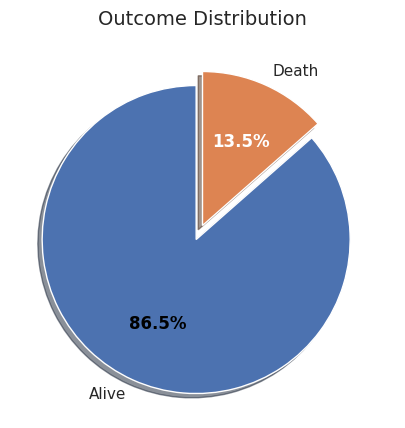

In [ ]:
fig, ax = plt.subplots(figsize=(8,5), dpi=100)

patches, texts, autotexts = ax.pie(df_final['outcome'].value_counts(), autopct= '%1.1f%%', shadow=True,
                                   startangle=90, explode=(0.1, 0), labels=['Alive','Death'])

plt.setp(autotexts, size=12, color = 'black', weight='bold')
autotexts[1].set_color('white');

plt.title('Outcome Distribution', fontsize=14)
plt.show()

<Axes: xlabel='diabetes', ylabel='Count'>

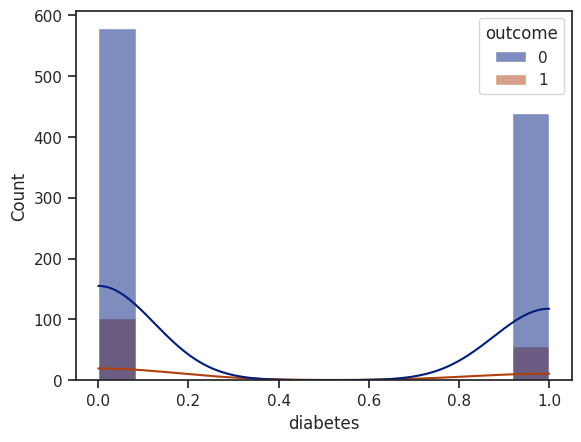

In [ ]:
sns.set_style("ticks")
sns.histplot(data = df_final, x = "diabetes", kde = True, hue = "outcome", palette = "dark")

In [ ]:
predictors = list(df_final.columns)
predictors.remove("outcome")
target = df_final['outcome']

In [ ]:
predictors.remove("group")
predictors.remove("ID")

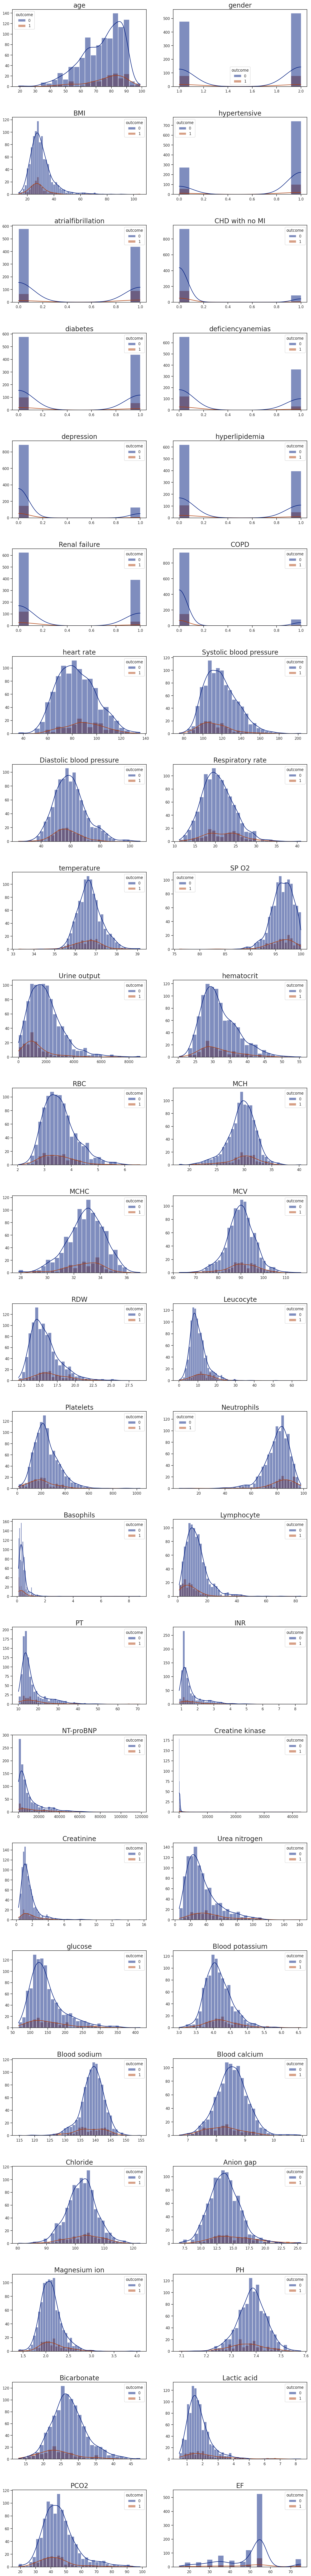

In [ ]:
fig, axes = plt.subplots(nrows=24, ncols=2, figsize=(16,140))
axes = axes.flatten()

for idx, axis in enumerate(axes):
    sns.histplot(data=df_final, x=df_final[predictors].iloc[:, idx],
                 ax=axis, hue=target, legend=True, kde = True, palette = "dark") #["#682F2F","#F3AB60"], viridis, dark
    axis.set_ylabel('')
    axis.set_xlabel('')
    axis.set_title(predictors[idx], fontsize = 20)

plt.subplots_adjust(hspace = 0.4)
plt.show()

In [ ]:
labels = ['No hypertensive+A', 'No hypertensive+D', 'hypertensive+A', 'hypertensive+D']
fig = go.Figure(data=[go.Pie(labels=labels, values=df_final.groupby(by=['hypertensive', 'outcome']).outcome.count(),
                             textinfo='label+percent',
                             insidetextorientation='radial',
                            )])
fig.show()

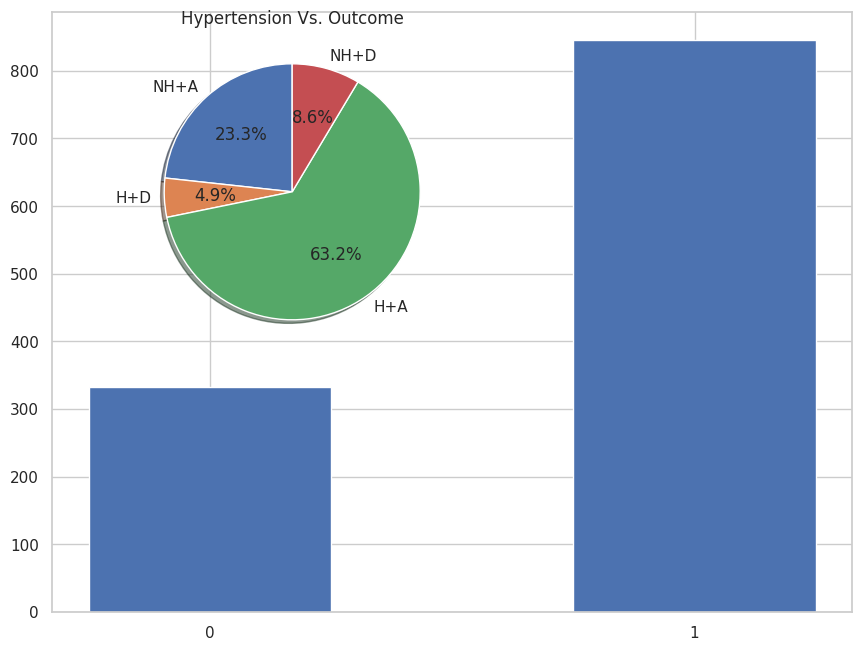

In [ ]:
fig = plt.figure(figsize=(8,6))
ax1 = fig.add_axes([0,0,1,1])
ax2 = fig.add_axes([0.1,0.4, 0.4,0.6])
lab = ['NH+A', 'H+D', 'H+A', 'NH+D']
ax1.bar(df_final['hypertensive'].unique(),df_final['hypertensive'].value_counts(sort=False), width=0.5)
ax1.set_xticks([0,1])

ax2.pie(df_final.groupby(by=['hypertensive', 'outcome']).outcome.count(), autopct= '%1.1f%%', shadow=True,
                                   startangle=90, labels=lab)
plt.title('Hypertension Vs. Outcome')

plt.show()

In [ ]:
labels = ['No atrialfibrillation+A', 'No atrialfibrillation+D', 'atrialfibrillation+A', 'atrialfibrillation+D']
fig = go.Figure(data=[go.Pie(labels=labels, values=df_final.groupby(by=['atrialfibrillation', 'outcome']).outcome.count(),
                             textinfo='label+percent',
                             insidetextorientation='radial',
                            )])
fig.show()

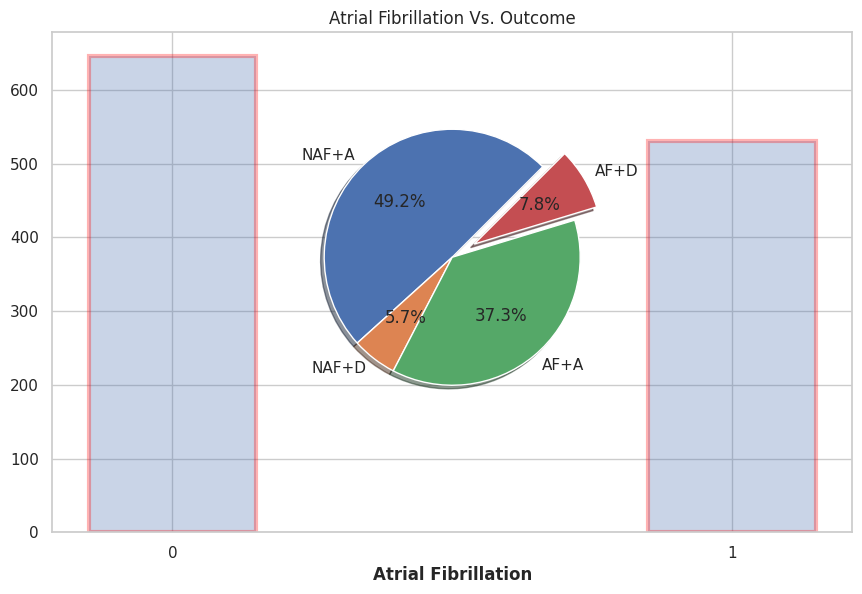

atrialfibrillation  outcome
0                   0          579
                    1           67
1                   0          439
                    1           92
Name: outcome, dtype: int64


In [ ]:
fig = plt.figure(figsize=(8,5))
ax1 = fig.add_axes([0,0,1,1])
ax2 = fig.add_axes([0.3,0.2, 0.4,0.7])
lab = ['NAF+A', 'NAF+D', 'AF+A', 'AF+D']

ax1.bar(df_final['atrialfibrillation'].unique(), df_final['atrialfibrillation'].value_counts(sort=False),
        width=0.3, alpha=0.3, edgecolor='red', linewidth=3)
ax1.set_xticks([0,1])
ax1.set_xlabel('Atrial Fibrillation', fontsize=12, weight='bold')
ax1.set_title('Atrial Fibrillation Vs. Outcome')

ax2.pie(df_final.groupby(['atrialfibrillation', 'outcome']).outcome.count(),autopct='%1.1f%%',
        shadow=True, labels=lab, explode=(0,0,0,0.2), startangle=45)

plt.show()

print(df_final.groupby(['atrialfibrillation', 'outcome']).outcome.count())

In [ ]:
labels = ['No CHD+A', 'No CHD+D', 'CHD+A', 'CHD+D']
fig = go.Figure(data=[go.Pie(labels=labels, values=df_final.groupby(by=['CHD with no MI', 'outcome']).outcome.count(),
                             textinfo='label+percent',
                             insidetextorientation='radial',
                            )])
fig.show()

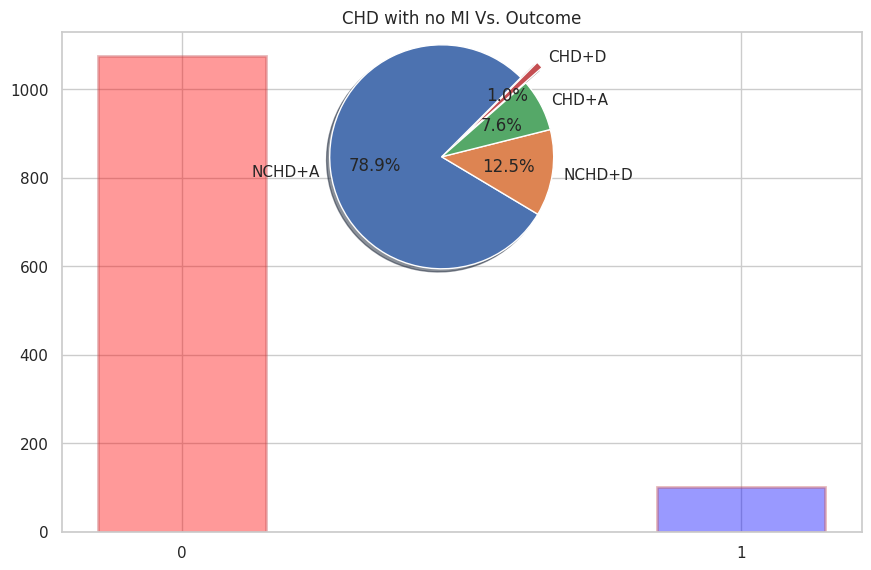

CHD with no MI  outcome
0               0          929
                1          147
1               0           89
                1           12
Name: outcome, dtype: int64


In [ ]:
fig = plt.figure(figsize=(8,5))
ax1 = fig.add_axes([0,0,1,1])
ax2 = fig.add_axes([0.3,0.4, 0.35, 0.7])
lab = ['NCHD+A', 'NCHD+D', 'CHD+A', 'CHD+D']

ax1.bar(df_final['CHD with no MI'].unique(), df_final['CHD with no MI'].value_counts(sort=False), width=0.3,
        alpha=0.4, linewidth=2, edgecolor='r', color=['red', 'blue'])
ax1.set_xticks([0,1])

ax1.set_title('CHD with no MI Vs. Outcome')

ax2.pie(df_final.groupby(['CHD with no MI', 'outcome']).outcome.count(), autopct='%1.1f%%', labels=lab,explode=(0,0,0,0.2), shadow=True, startangle=45)

plt.show()

print(df_final.groupby(['CHD with no MI', 'outcome']).outcome.count())

In [ ]:
labels = ['No Diabetic+A', 'No Diabetic+D', 'Diabetic+A', 'Diabetic+D']
fig = go.Figure(data=[go.Pie(labels=labels, values=df_final.groupby(by=['diabetes', 'outcome']).outcome.count(),
                             textinfo='label+percent',
                             insidetextorientation='radial',
                            )])
fig.show()

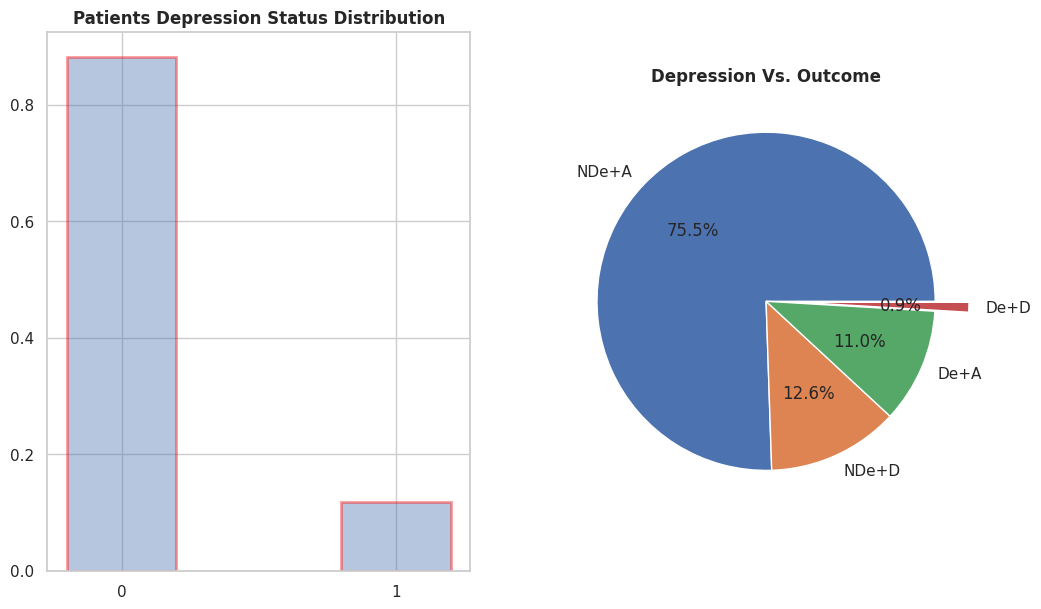

depression  outcome
0           0          889
            1          148
1           0          129
            1           11
Name: outcome, dtype: int64


In [ ]:
fig, ax = plt.subplots(1,2, figsize=(12,7))

plot = ax[0].bar(df_final['depression'].unique(), df_final['depression'].value_counts(sort=False, normalize=True), width=0.4, alpha=0.4, edgecolor='red', linewidth=2)
ax[0].set_xticks([0,1])
ax[0].set_title('Patients Depression Status Distribution', weight='bold')

plt.subplot(1,2,2)
plt.pie(df_final.groupby(['depression', 'outcome']).outcome.count(), autopct='%1.1f%%', labels= ['NDe+A', 'NDe+D', 'De+A', 'De+D'],
        explode=(0,0,0,0.2))
plt.title('Depression Vs. Outcome', weight='bold')

plt.show()

print(df_final.groupby(['depression', 'outcome']).outcome.count())

In [ ]:
labels = ['No Depressed+A', 'No Depressed+D', 'Depressed+A', 'Depressed+D']
fig = go.Figure(data=[go.Pie(labels=labels, values=df_final.groupby(by=['depression', 'outcome']).outcome.count(),
                             textinfo='label+percent',
                             insidetextorientation='radial',
                            )])
fig.show()

In [ ]:
labels = ['No Hyperlipidemia+A', 'No Hyperlipidemia+D', 'Hyperlipidemia+A', 'Hyperlipidemia+D']
fig = go.Figure(data=[go.Pie(labels=labels, values=df_final.groupby(by=['hyperlipidemia', 'outcome']).outcome.count(),
                             textinfo='label+percent',
                             insidetextorientation='radial',
                            )])
fig.show()

In [ ]:
labels = ['No COPD+A', 'No COPD+D', 'COPD+A', 'COPD+D']
fig = go.Figure(data=[go.Pie(labels=labels, values=df_final.groupby(by=['COPD', 'outcome']).outcome.count(),
                             textinfo='label+percent',
                             insidetextorientation='radial',
                            )])
fig.show()

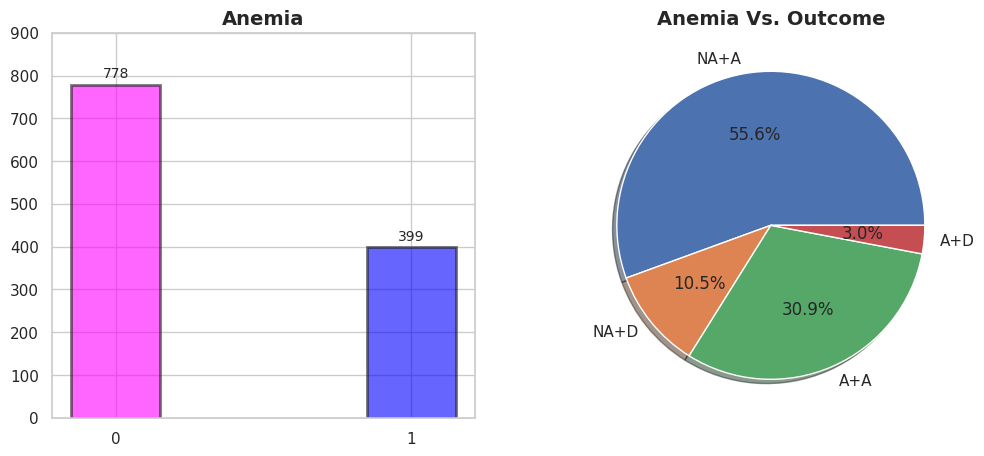

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(12,5))


ax[0].bar(df_final['deficiencyanemias'].unique(), df_final['deficiencyanemias'].value_counts(sort=False),
          width=0.3, alpha=0.6, color=['blue', 'magenta'], edgecolor='k', linewidth=2)
ax[0].set_title('Anemia', fontsize=14, weight='bold')
ax[0].set_xticks([0,1])
ax[0].set_ylim(0, 900)

for x in ax[0].patches:
  ax[0].annotate(format(x.get_height()),
                 (x.get_x() + x.get_width() / 2,
                 x.get_height()), ha='center', va='center',
                 size=10, xytext=(0,8),
                 textcoords = 'offset points')

ax[1].pie(df_final.groupby(['deficiencyanemias', 'outcome']).outcome.count(), autopct='%1.1f%%', labels=['NA+A', 'NA+D', 'A+A', 'A+D'], shadow=True)
ax[1].set_title('Anemia Vs. Outcome', fontsize=14, weight='bold')

plt.show()

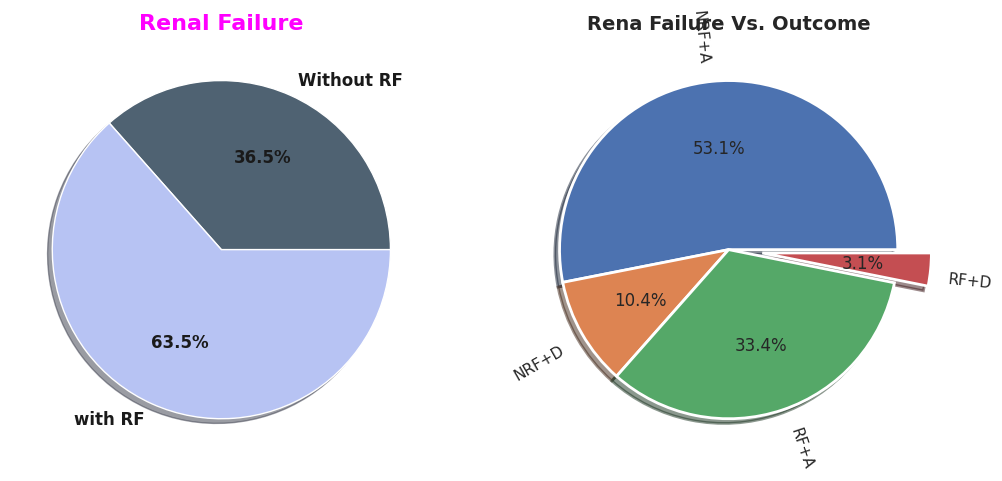

In [ ]:
plt.figure(figsize=(12,7))
plt.subplot(1,2,1)
plt.pie(df_final['Renal failure'].value_counts(sort=False), autopct='%1.1f%%', shadow=True, labels=['Without RF', 'with RF'],
        colors = ['#4F6272', '#B7C3F3'], textprops = {'color':'k', 'weight':'bold', 'size': 12},
        rotatelabels=False);
plt.title('Renal Failure', fontsize=16, weight='bold', color='magenta')

plt.subplot(1,2,2)
plt.pie(df_final.groupby(['Renal failure', 'outcome']).outcome.count(), autopct='%1.1f%%', shadow=True,
        wedgeprops = { 'linewidth' : 2, 'edgecolor' : 'white' },
        labels = ['NRF+A', 'NRF+D', 'RF+A', 'RF+D'],
        explode=(0,0,0,0.2), rotatelabels=True)
plt.title('Rena Failure Vs. Outcome', fontsize=14, weight='bold')

plt.show()

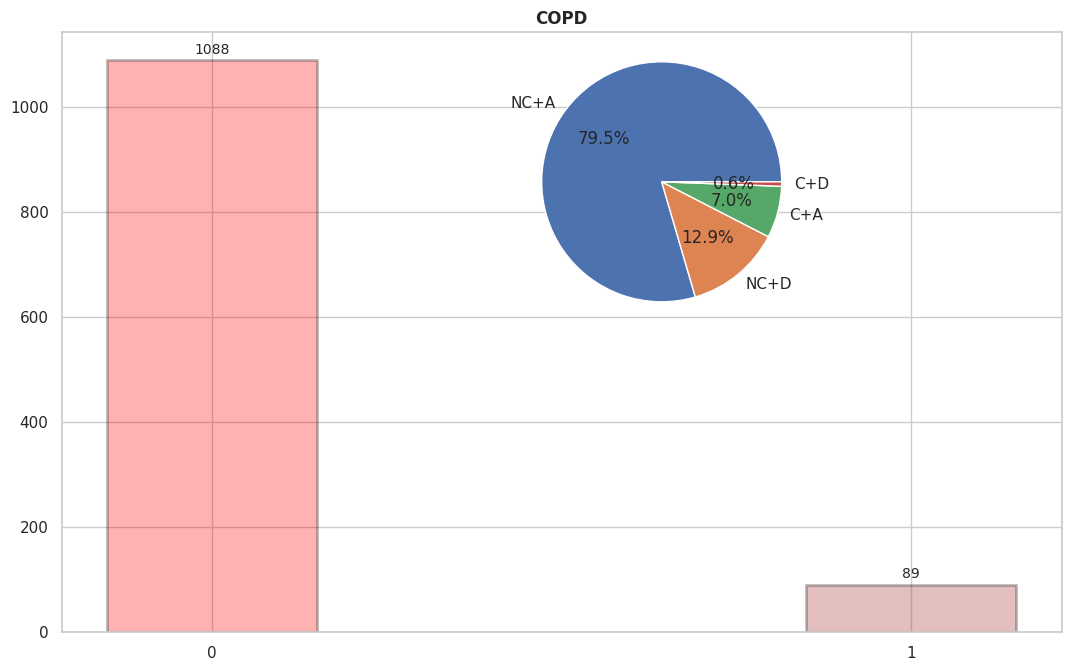

In [ ]:
fig = plt.figure(figsize=(10,6))

ax1 = fig.add_axes([0,0,1,1])
ax2 = fig.add_axes([0.2,0.5,0.8,0.5])

ax1.bar(df_final['COPD'].unique(), df_final['COPD'].value_counts(), width=0.3, color=['red', 'brown'], alpha=0.3, edgecolor='k', linewidth=2)

for y in ax1.patches:
  ax1.annotate(format(y.get_height()),
               (y.get_x() + y.get_width()/2,
                y.get_height()), ha='center', va='center',
               size=10, xytext=(0,8),
               textcoords = 'offset points')
ax1.set_title('COPD', weight='bold')
ax1.set_xticks([0,1])

ax2.pie(df_final.groupby(['COPD', 'outcome']).outcome.count(), autopct='%1.1f%%',
        labels=['NC+A', 'NC+D', 'C+A', 'C+D'])

plt.show()

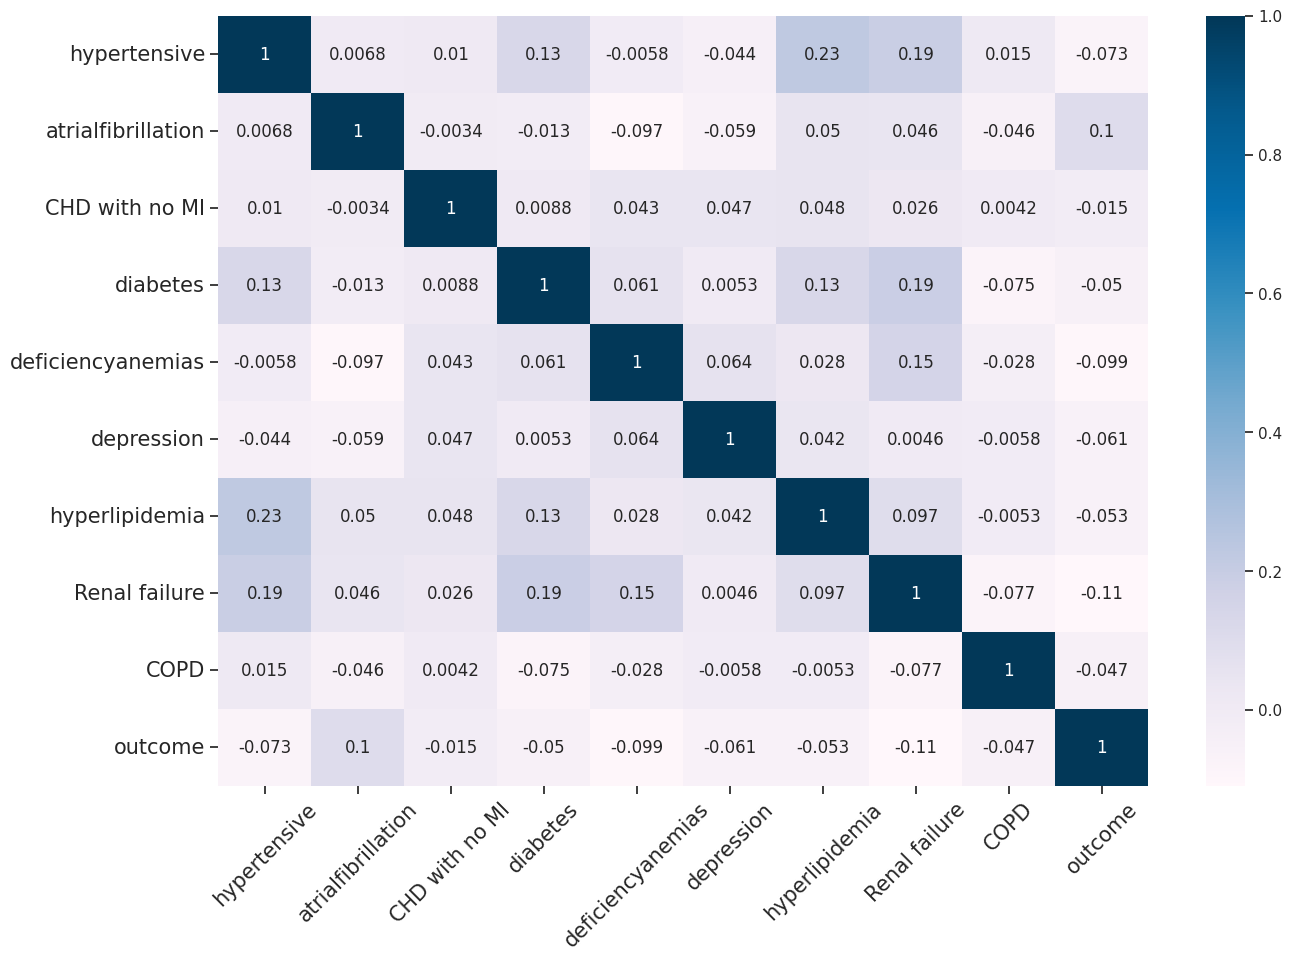

In [ ]:
corr_cols = ['hypertensive', 'atrialfibrillation', 'CHD with no MI', 'diabetes', 'deficiencyanemias',
             'depression', 'hyperlipidemia', 'Renal failure', 'COPD', 'outcome']

cor = df_final[corr_cols].corr()

plt.figure(figsize=(15,10))
sns.heatmap(cor, annot = True, cmap = "PuBu")
plt.xticks(fontsize = 15, rotation = 45)
plt.yticks(fontsize = 15)
plt.show()

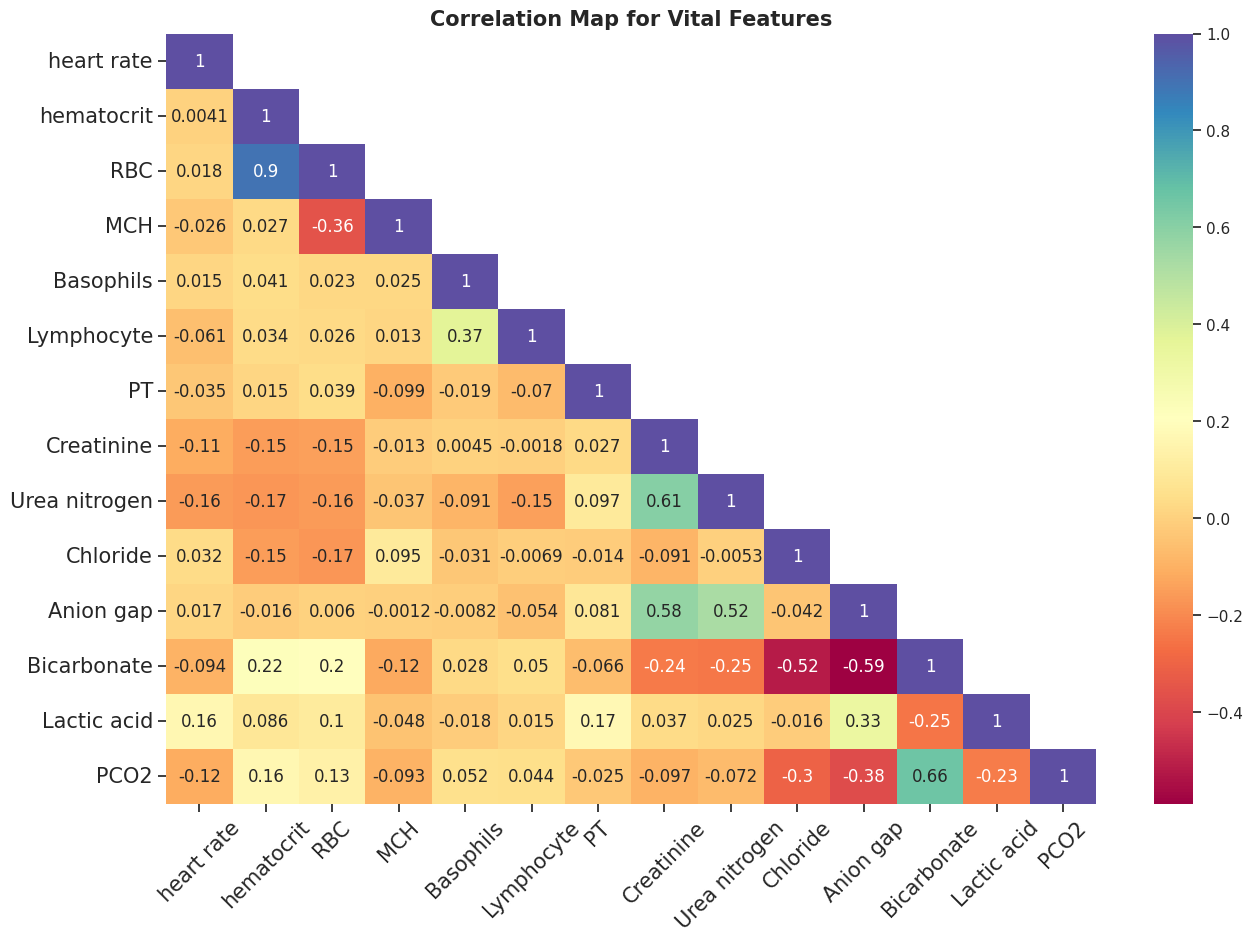

In [ ]:
continous_corr = ['heart rate','hematocrit', 'RBC', 'MCH',
        'Basophils', 'Lymphocyte', 'PT', 'Creatinine', 'Urea nitrogen',
       'Chloride', 'Anion gap', 'Bicarbonate',
       'Lactic acid', 'PCO2'] # BMI, Urine Output

corr2 = df_final[continous_corr].corr()
df_lt = corr2.where(np.tril(np.ones(corr2.shape)).astype(np.bool))
plt.figure(figsize=(15,10))
hmap=sns.heatmap(df_lt,cmap="Spectral", annot = True)
plt.xticks(fontsize = 15, rotation = 45)
plt.yticks(fontsize = 15)
plt.title("Correlation Map for Vital Features", fontsize=15, weight="bold")
plt.show()

In [ ]:
continous_corr = ['age', 'Systolic blood pressure', 'Diastolic blood pressure',
       'Respiratory rate', 'SP O2', 'Urine output',
       'hematocrit', 'MCHC', 'Platelets', 'Neutrophils', 'PT', 'INR',
       'NT-proBNP', 'Creatine kinase', 'Urea nitrogen','glucose', 'PCO2', 'EF', 'outcome']

corr2 = df_final[continous_corr].corr()
corr2.style.background_gradient(cmap = 'PuBu')

,age,Systolic blood pressure,Diastolic blood pressure,Respiratory rate,SP O2,Urine output,hematocrit,MCHC,Platelets,Neutrophils,PT,INR,NT-proBNP,Creatine kinase,Urea nitrogen,glucose,PCO2,EF,outcome
age,1.000000,-0.029649,-0.345513,-0.043800,0.057799,-0.247919,-0.019583,0.016170,-0.037388,0.118338,0.097998,0.100524,0.054536,-0.018327,0.106833,-0.092406,-0.102289,0.054400,0.064270
Systolic blood pressure,-0.029649,1.000000,0.390094,-0.074975,-0.006807,0.211567,0.018260,0.026299,0.086860,-0.024424,-0.177631,-0.165171,-0.071131,-0.012762,-0.019131,0.066316,0.100099,0.226592,-0.133224
Diastolic blood pressure,-0.345513,0.390094,1.000000,0.106911,-0.114668,0.225834,0.309720,-0.023943,0.055551,-0.089266,-0.047967,-0.050701,-0.016125,-0.027991,-0.149433,0.033490,0.012190,-0.134197,-0.087079
Respiratory rate,-0.043800,-0.074975,0.106911,1.000000,-0.215226,0.067926,0.084074,-0.010422,0.155939,0.037782,0.024181,0.020786,-0.025651,0.078154,-0.035647,0.081725,-0.070883,-0.060593,0.115692
SP O2,0.057799,-0.006807,-0.114668,-0.215226,1.000000,-0.070579,-0.270739,0.052656,-0.059114,-0.025378,-0.011487,-0.016451,0.092303,-0.051142,0.040086,-0.044838,-0.199101,-0.036991,-0.069864
Urine output,-0.247919,0.211567,0.225834,0.067926,-0.070579,1.000000,0.172270,0.051555,0.047278,-0.119886,-0.062096,-0.060815,-0.226660,-0.017343,-0.190251,0.032129,0.109944,0.039386,-0.173214
hematocrit,-0.019583,0.018260,0.309720,0.084074,-0.270739,0.172270,1.000000,-0.052613,-0.038664,0.017173,0.014903,0.016272,-0.158239,0.031866,-0.171557,0.007457,0.164785,-0.095595,-0.016786
MCHC,0.016170,0.026299,-0.023943,-0.010422,0.052656,0.051555,-0.052613,1.000000,-0.174326,-0.046903,-0.118018,-0.115921,-0.076997,0.035365,-0.088781,-0.039851,-0.264914,0.070109,-0.031810
Platelets,-0.037388,0.086860,0.055551,0.155939,-0.059114,0.047278,-0.038664,-0.174326,1.000000,0.140518,-0.004628,-0.007119,-0.032953,-0.012640,-0.156090,0.023037,-0.022892,0.025290,-0.088413
Neutrophils,0.118338,-0.024424,-0.089266,0.037782,-0.025378,-0.119886,0.017173,-0.046903,0.140518,1.000000,0.053557,0.047311,0.105890,0.015000,0.112438,0.058907,-0.014000,0.056773,0.073277


In [ ]:
predictors.remove("gender")

X = df_final[predictors]
X.head()

,age,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,deficiencyanemias,depression,hyperlipidemia,Renal failure,COPD,heart rate,Systolic blood pressure,Diastolic blood pressure,Respiratory rate,temperature,SP O2,Urine output,hematocrit,RBC,MCH,MCHC,MCV,RDW,Leucocyte,Platelets,Neutrophils,Basophils,Lymphocyte,PT,INR,NT-proBNP,Creatine kinase,Creatinine,Urea nitrogen,glucose,Blood potassium,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
0,72,37.588179,0,0,0,1,1,0,1,1,0,68.837838,155.866667,68.333333,16.621622,36.714286,98.394737,2155.0,26.272727,2.960000,28.250000,31.520000,89.900,16.220000,7.650000,305.100,74.650,0.40,13.300000,10.600000,1.000000,1956.0,148.000000,1.958333,50.000000,114.636364,4.816667,138.750000,7.463636,109.166667,13.166667,2.618182,7.230,21.166667,0.5,40.0,55
1,75,30.324638,0,0,0,0,1,0,0,0,1,101.370370,140.000000,65.000000,20.851852,36.682540,96.923077,1425.0,30.780000,3.138000,31.060000,31.660000,98.200,14.260000,12.740000,246.400,80.800,0.35,11.866667,13.925238,1.228571,2384.0,60.600000,1.122222,20.333333,147.500000,4.450000,138.888889,8.162500,98.444444,11.444444,1.887500,7.225,33.444444,0.5,78.0,55
2,83,26.572634,0,0,0,0,1,0,0,1,0,72.318182,135.333333,61.375000,23.640000,36.453704,95.291667,2425.0,27.700000,2.620000,34.320000,31.300000,109.800,23.820000,5.480000,204.200,68.100,0.55,24.500000,11.275000,0.950000,4081.0,16.000000,1.871429,33.857143,149.000000,5.825000,140.714286,8.266667,105.857143,10.000000,2.157143,7.268,30.571429,0.5,71.5,35
3,43,83.264629,0,0,0,0,0,0,0,0,0,94.500000,126.400000,73.200000,21.857143,36.287037,93.846154,8760.0,36.637500,4.277500,26.062500,30.412500,85.625,17.037500,8.225000,216.375,81.800,0.15,14.500000,27.066667,2.666667,668.0,85.000000,0.585714,15.285714,128.250000,4.386667,138.500000,9.476923,92.071429,12.357143,1.942857,7.370,38.571429,0.6,75.0,55
4,75,31.824842,1,0,0,0,1,0,0,1,1,67.920000,156.560000,58.120000,21.360000,36.761905,99.280000,4455.0,29.933333,3.286667,30.666667,33.666667,91.000,16.266667,8.833333,251.000,84.342,0.20,9.490000,16.299026,1.496818,30802.0,111.666667,1.950000,43.000000,145.750000,4.783333,136.666667,8.733333,104.500000,15.166667,1.650000,7.250,22.000000,0.6,50.0,55


In [ ]:
X.shape, y.shape

((1177, 47), (1177, 1))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X , y,
                                                    test_size = 0.3, random_state = 11)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((823, 47), (354, 47), (823, 1), (354, 1))

In [ ]:
## checking distribution of traget variable in train test split
print('Distribution of traget variable in training set')
print(y_train.value_counts())

print('Distribution of traget variable in test set')
print(y_test.value_counts())

Distribution of traget variable in training set
outcome
0          708
1          115
dtype: int64
Distribution of traget variable in test set
outcome
0          310
1           44
dtype: int64


In [ ]:
print('------------Training Set------------------')
print(X_train.shape)
print(y_train.shape)

print('------------Test Set------------------')
print(X_test.shape)
print(y_test.shape)

------------Training Set------------------
(823, 47)
(823, 1)
------------Test Set------------------
(354, 47)
(354, 1)


# Normalization-minmax scalaer

In [ ]:
len(X_train.columns), X_train.columns

(47,
 Index(['age', 'BMI', 'hypertensive', 'atrialfibrillation', 'CHD with no MI',
        'diabetes', 'deficiencyanemias', 'depression', 'hyperlipidemia',
        'Renal failure', 'COPD', 'heart rate', 'Systolic blood pressure',
        'Diastolic blood pressure', 'Respiratory rate', 'temperature', 'SP O2',
        'Urine output', 'hematocrit', 'RBC', 'MCH', 'MCHC', 'MCV', 'RDW',
        'Leucocyte', 'Platelets', 'Neutrophils', 'Basophils', 'Lymphocyte',
        'PT', 'INR', 'NT-proBNP', 'Creatine kinase', 'Creatinine',
        'Urea nitrogen', 'glucose', 'Blood potassium', 'Blood sodium',
        'Blood calcium', 'Chloride', 'Anion gap', 'Magnesium ion', 'PH',
        'Bicarbonate', 'Lactic acid', 'PCO2', 'EF'],
       dtype='object'))

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train[['age', 'BMI', 'hypertensive', 'atrialfibrillation', 'CHD with no MI',
       'diabetes', 'deficiencyanemias', 'depression', 'hyperlipidemia',
       'Renal failure', 'COPD', 'heart rate', 'Systolic blood pressure',
       'Diastolic blood pressure', 'Respiratory rate', 'temperature', 'SP O2',
       'Urine output', 'hematocrit', 'RBC', 'MCH', 'MCHC', 'MCV', 'RDW',
       'Leucocyte', 'Platelets', 'Neutrophils', 'Basophils', 'Lymphocyte',
       'PT', 'INR', 'NT-proBNP', 'Creatine kinase', 'Creatinine',
       'Urea nitrogen', 'glucose', 'Blood potassium', 'Blood sodium',
       'Blood calcium', 'Chloride', 'Anion gap', 'Magnesium ion', 'PH',
       'Bicarbonate', 'Lactic acid', 'PCO2', 'EF']] = scaler.fit_transform(X_train[['age', 'BMI', 'hypertensive', 'atrialfibrillation', 'CHD with no MI',
       'diabetes', 'deficiencyanemias', 'depression', 'hyperlipidemia',
       'Renal failure', 'COPD', 'heart rate', 'Systolic blood pressure',
       'Diastolic blood pressure', 'Respiratory rate', 'temperature', 'SP O2',
       'Urine output', 'hematocrit', 'RBC', 'MCH', 'MCHC', 'MCV', 'RDW',
       'Leucocyte', 'Platelets', 'Neutrophils', 'Basophils', 'Lymphocyte',
       'PT', 'INR', 'NT-proBNP', 'Creatine kinase', 'Creatinine',
       'Urea nitrogen', 'glucose', 'Blood potassium', 'Blood sodium',
       'Blood calcium', 'Chloride', 'Anion gap', 'Magnesium ion', 'PH',
       'Bicarbonate', 'Lactic acid', 'PCO2', 'EF']])
X_train.head()

,age,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,deficiencyanemias,depression,hyperlipidemia,Renal failure,COPD,heart rate,Systolic blood pressure,Diastolic blood pressure,Respiratory rate,temperature,SP O2,Urine output,hematocrit,RBC,MCH,MCHC,MCV,RDW,Leucocyte,Platelets,Neutrophils,Basophils,Lymphocyte,PT,INR,NT-proBNP,Creatine kinase,Creatinine,Urea nitrogen,glucose,Blood potassium,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
4,0.675676,0.198816,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.296706,0.748922,0.368105,0.343460,0.524149,0.957480,0.505102,0.274029,0.276494,0.565213,0.635215,0.524815,0.246315,0.135086,0.261307,0.853525,0.034483,0.144382,0.103923,0.091947,0.258685,0.002412,0.133908,0.240694,0.264419,0.500000,0.549037,0.465863,0.573439,0.447179,0.093537,0.326531,0.262654,0.012766,0.385588,0.666667
576,0.905405,0.083536,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.321079,0.206958,0.270380,0.340410,0.575659,0.725167,0.126984,0.530202,0.497564,0.516498,0.520429,0.522175,0.178373,0.285051,0.231310,0.969575,0.068966,0.045455,0.049735,0.030812,0.034607,0.001187,0.057200,0.102763,0.195040,0.292390,0.664311,0.361446,0.679924,0.415023,0.208455,0.489796,0.254446,0.278298,0.221239,0.333333
672,0.554054,0.210595,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.405731,0.308603,0.391983,0.289764,0.395744,0.375703,0.141156,0.619951,0.483608,0.673073,0.590859,0.683738,0.144514,0.137046,0.189007,0.794604,0.072414,0.240836,0.040235,0.030812,0.000715,0.004540,0.021545,0.097625,0.078016,0.308411,0.607268,0.409639,0.407796,0.289616,0.247874,0.510204,0.593023,0.120532,0.505689,0.666667
129,0.729730,0.023470,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.641710,0.818451,0.497876,0.062565,0.397974,0.838145,0.139456,0.350257,0.356656,0.554096,0.679207,0.493400,0.171045,0.184841,0.213576,0.903559,0.000000,0.127612,0.030455,0.017974,0.080562,0.001256,0.061319,0.287451,0.332795,0.176986,0.730489,0.329317,0.511323,0.262605,0.443991,0.433673,0.609183,0.076596,0.578382,0.583333
1053,0.729730,0.222436,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.462460,0.237651,0.299800,0.267640,0.310671,0.895518,0.482993,0.651847,0.577401,0.497183,0.392659,0.559134,0.261757,0.172136,0.202397,0.873708,0.068966,0.063241,0.111693,0.092437,0.063174,0.004825,0.165366,0.428043,0.634383,0.306409,0.540718,0.542169,0.296579,0.426170,0.352324,0.612245,0.578659,0.255319,0.359671,0.166667


In [ ]:
X_test[['age', 'BMI', 'hypertensive', 'atrialfibrillation', 'CHD with no MI',
       'diabetes', 'deficiencyanemias', 'depression', 'hyperlipidemia',
       'Renal failure', 'COPD', 'heart rate', 'Systolic blood pressure',
       'Diastolic blood pressure', 'Respiratory rate', 'temperature', 'SP O2',
       'Urine output', 'hematocrit', 'RBC', 'MCH', 'MCHC', 'MCV', 'RDW',
       'Leucocyte', 'Platelets', 'Neutrophils', 'Basophils', 'Lymphocyte',
       'PT', 'INR', 'NT-proBNP', 'Creatine kinase', 'Creatinine',
       'Urea nitrogen', 'glucose', 'Blood potassium', 'Blood sodium',
       'Blood calcium', 'Chloride', 'Anion gap', 'Magnesium ion', 'PH',
       'Bicarbonate', 'Lactic acid', 'PCO2', 'EF']] = scaler.transform(X_test[['age', 'BMI', 'hypertensive', 'atrialfibrillation', 'CHD with no MI',
       'diabetes', 'deficiencyanemias', 'depression', 'hyperlipidemia',
       'Renal failure', 'COPD', 'heart rate', 'Systolic blood pressure',
       'Diastolic blood pressure', 'Respiratory rate', 'temperature', 'SP O2',
       'Urine output', 'hematocrit', 'RBC', 'MCH', 'MCHC', 'MCV', 'RDW',
       'Leucocyte', 'Platelets', 'Neutrophils', 'Basophils', 'Lymphocyte',
       'PT', 'INR', 'NT-proBNP', 'Creatine kinase', 'Creatinine',
       'Urea nitrogen', 'glucose', 'Blood potassium', 'Blood sodium',
       'Blood calcium', 'Chloride', 'Anion gap', 'Magnesium ion', 'PH',
       'Bicarbonate', 'Lactic acid', 'PCO2', 'EF']])
X_test.head()

,age,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,deficiencyanemias,depression,hyperlipidemia,Renal failure,COPD,heart rate,Systolic blood pressure,Diastolic blood pressure,Respiratory rate,temperature,SP O2,Urine output,hematocrit,RBC,MCH,MCHC,MCV,RDW,Leucocyte,Platelets,Neutrophils,Basophils,Lymphocyte,PT,INR,NT-proBNP,Creatine kinase,Creatinine,Urea nitrogen,glucose,Blood potassium,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
600,0.513514,0.204725,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.603802,0.251185,0.612978,0.519523,0.326602,0.763780,0.341837,0.727031,0.674147,0.529760,0.588677,0.510032,0.131543,0.168600,0.203293,0.834673,0.000000,0.153021,0.116723,0.100140,0.096183,0.001474,0.080610,0.241334,0.649047,0.445794,0.484982,0.447122,0.391232,0.448980,0.324263,0.673469,0.400547,0.306383,0.107459,0.666667
893,0.527027,0.173333,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.446626,0.217793,0.357271,0.476101,0.699391,0.854634,0.156463,0.242821,0.390539,0.366168,0.743832,0.243004,0.490010,0.136118,0.162273,0.688576,0.034483,0.309289,0.560771,0.604692,0.059616,0.001326,0.166089,0.402292,0.503761,0.422897,0.507443,0.295728,0.602480,0.497108,0.302721,0.479592,0.137296,0.093617,0.195954,0.333333
371,0.851351,0.138329,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.726640,0.530432,0.337908,0.514763,0.609115,0.657972,0.102834,0.307661,0.336948,0.482376,0.564058,0.458817,0.116045,0.111148,0.340626,0.918485,0.034483,0.054771,0.048617,0.030812,0.006603,0.006038,0.038007,0.051001,0.687211,0.339564,0.557356,0.367470,0.453808,0.402161,0.196429,0.530612,0.422253,0.153191,0.335019,0.666667
390,0.608108,0.262587,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.552848,0.181356,0.296177,0.270008,0.642570,0.774050,0.010204,0.439206,0.365725,0.491103,0.237708,0.631585,0.239764,0.126321,0.125041,0.803674,0.310345,0.119142,0.051299,0.049300,0.069651,0.001854,0.319258,0.163325,0.421287,0.521495,0.412609,0.468158,0.294213,0.497599,0.253590,0.606122,0.412038,0.157447,0.466498,0.250000
872,0.135135,0.137220,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.853702,0.647812,0.641505,0.257942,0.762762,0.831584,0.476190,0.122498,0.163445,0.547401,0.629501,0.506336,0.091619,0.101425,0.497256,0.811711,0.094828,0.235178,0.027661,0.030812,0.055982,0.004165,0.084370,0.079097,0.161605,0.267630,0.505174,0.274699,0.443291,0.393976,0.231973,0.612245,0.367119,0.076596,0.225453,0.583333


In [ ]:

import numpy as np
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
%matplotlib inline
!pip install --upgrade pip
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
! pip install -q scikit-plot
import scikitplot as skplt
import pickle

import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# data wrangling & pre-processing
import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split

#model validation
from sklearn.metrics import log_loss,roc_auc_score,precision_score,f1_score,recall_score,roc_curve,auc
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,fbeta_score,matthews_corrcoef
from sklearn import metrics

# cross validation
from sklearn.model_selection import StratifiedKFold

# machine learning algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,VotingClassifier,AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier,ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
import xgboost as xgb

from scipy import stats

In [ ]:
comp_ev = pd.DataFrame({'Model': [],
                           'Accuracy(train)':[],
                           'Precision(train)':[],
                           'Recall(train)':[],

                           'F1_score(train)':[],
                          'ROC(train)':[],
                        'Log_Loss(train)':[],
                        'mathew_corrcoef(train)':[],
                         'Accuracy(test)':[],
                           'Precision(test)':[],
                           'Recall(test)':[],

                           'F1_score(test)':[],
                          'ROC(test)':[],
                        'Log_Loss(test)':[],
                        'mathew_corrcoef(test)':[],})

# Logistic Regression

The accuracy of the Logistic Regression is(For training data) : 0.882
The accuracy of the Logistic Regression is(For test data) : 0.904


,Model,Accuracy(train),Precision(train),Recall(train),F1_score(train),ROC(train),Log_Loss(train),mathew_corrcoef(train),Accuracy(test),Precision(test),Recall(test),F1_score(test),ROC(test),Log_Loss(test),mathew_corrcoef(test)
0,Logistic Regression,0.882,0.819,0.611,0.646,4.248158,0.37646,0.611035,0.904,0.882,0.633,0.681,0.633138,3.46182,0.450749


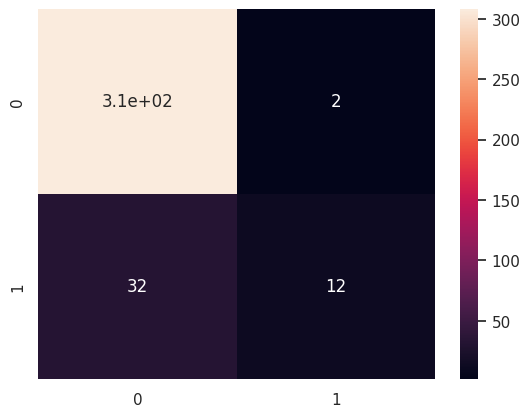

In [ ]:
log_model = LogisticRegression(max_iter=500)
log_model.fit(X_train,y_train)
acc_train1=format(accuracy_score(log_model.predict(X_train), y_train),'.3f')
#acc_train2=log_model.predict(X_train)
print('The accuracy of the Logistic Regression is(For training data) :',acc_train1)
#acc_test2=log_model.predict(X_test)
acc_test1=format(accuracy_score(log_model.predict(X_test), y_test),'.3f')
print('The accuracy of the Logistic Regression is(For test data) :',acc_test1)

y_pred_train= log_model.predict(X_train)
y_pred_test= log_model.predict(X_test)


precision_train1=format(precision_score(y_train, log_model.predict(X_train), average='macro'),'.3f')
precision_test1=format(precision_score(y_test, log_model.predict(X_test), average='macro'),'.3f')


recall_train1=format(recall_score(y_train,log_model.predict(X_train), average='macro'),'.3f')
recall_test1=format(recall_score(y_test,log_model.predict(X_test), average='macro'),'.3f')

f1_train1=format(f1_score(y_train,log_model.predict(X_train), average='macro'),'.3f')
f1_test1=format(f1_score(y_test,log_model.predict(X_test), average='macro'),'.3f')

roc_train1=roc_auc_score(y_train, y_pred_train)
roc_test1=roc_auc_score(y_test, y_pred_test)

CM=confusion_matrix(y_test,y_pred_test)
sns.heatmap(CM, annot=True)

log_loss_train1= log_loss(y_train, y_pred_train)
log_loss_test1= log_loss(y_test, y_pred_test)

mathew_train1 = matthews_corrcoef(y_train, y_pred_train)
mathew_test1 = matthews_corrcoef(y_test, y_pred_test)

r = comp_ev.shape[0]
comp_ev.loc[r] = ['Logistic Regression',acc_train1,precision_train1,recall_train1,f1_train1,log_loss_train1,mathew_train1,roc_train1,acc_test1,precision_test1,recall_test1,f1_test1,roc_test1,log_loss_test1,mathew_test1]
#compare_evaluation.sort_values(by = 'Accuracy(test)', ascending=False)
comp_ev.sort_values(by = 'Accuracy(test)', ascending=False)

# Support Vector Machine

The accuracy of the Support Vector Machine is(For training data) : 0.880
The accuracy of the Support Vector Machine is(For test data) : 0.898


,Model,Accuracy(train),Precision(train),Recall(train),F1_score(train),ROC(train),Log_Loss(train),mathew_corrcoef(train),Accuracy(test),Precision(test),Recall(test),F1_score(test),ROC(test),Log_Loss(test),mathew_corrcoef(test)
0,Logistic Regression,0.882,0.819,0.611,0.646,4.248158,0.376460,0.611035,0.904,0.882,0.633,0.681,0.633138,3.461820,0.450749
1,Support Vector Machine,0.880,0.857,0.584,0.611,4.335749,0.346718,0.584132,0.898,0.867,0.610,0.651,0.610411,3.665456,0.402573


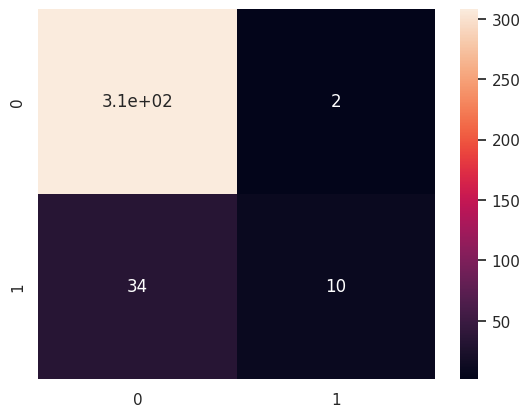

In [ ]:
svm_model =SVC(kernel='linear',gamma='auto',probability=True)
svm_model.fit(X_train,y_train)
acc_train1=format(accuracy_score(svm_model.predict(X_train), y_train),'.3f')
#acc_train2=log_model.predict(X_train)
print('The accuracy of the Support Vector Machine is(For training data) :',acc_train1)
#acc_test2=log_model.predict(X_test)
acc_test1=format(accuracy_score(svm_model.predict(X_test), y_test),'.3f')
print('The accuracy of the Support Vector Machine is(For test data) :',acc_test1)

y_pred_train= svm_model.predict(X_train)
y_pred_test= svm_model.predict(X_test)


precision_train1=format(precision_score(y_train,y_pred_train , average='macro'),'.3f')
precision_test1=format(precision_score(y_test, y_pred_test, average='macro'),'.3f')


recall_train1=format(recall_score(y_train,y_pred_train, average='macro'),'.3f')
recall_test1=format(recall_score(y_test,y_pred_test, average='macro'),'.3f')

f1_train1=format(f1_score(y_train,y_pred_train, average='macro'),'.3f')
f1_test1=format(f1_score(y_test,y_pred_test, average='macro'),'.3f')

roc_train1=roc_auc_score(y_train, y_pred_train)
roc_test1=roc_auc_score(y_test, y_pred_test)

CM=confusion_matrix(y_test,y_pred_test)
sns.heatmap(CM, annot=True)

log_loss_train1= log_loss(y_train, y_pred_train)
log_loss_test1= log_loss(y_test, y_pred_test)

mathew_train1 = matthews_corrcoef(y_train, y_pred_train)
mathew_test1 = matthews_corrcoef(y_test, y_pred_test)

r = comp_ev.shape[0]
comp_ev.loc[r] = ['Support Vector Machine',acc_train1,precision_train1,recall_train1,f1_train1,log_loss_train1,mathew_train1,roc_train1,acc_test1,precision_test1,recall_test1,f1_test1,roc_test1,log_loss_test1,mathew_test1]
#compare_evaluation.sort_values(by = 'Accuracy(test)', ascending=False)
comp_ev.sort_values(by = 'Accuracy(test)', ascending=False)

# Decsion Tree

The accuracy of the Support Vector Machine is(For training data) : 1.000
The accuracy of the Support Vector Machine is(For test data) : 0.811


,Model,Accuracy(train),Precision(train),Recall(train),F1_score(train),ROC(train),Log_Loss(train),mathew_corrcoef(train),Accuracy(test),Precision(test),Recall(test),F1_score(test),ROC(test),Log_Loss(test),mathew_corrcoef(test)
0,Logistic Regression,0.882,0.819,0.611,0.646,4.248158e+00,0.376460,0.611035,0.904,0.882,0.633,0.681,0.633138,3.461820,0.450749
1,Support Vector Machine,0.880,0.857,0.584,0.611,4.335749e+00,0.346718,0.584132,0.898,0.867,0.610,0.651,0.610411,3.665456,0.402573
2,Decision Tree,1.000,1.000,1.000,1.000,2.220446e-16,1.000000,1.000000,0.811,0.562,0.560,0.561,0.560411,6.821821,0.122021


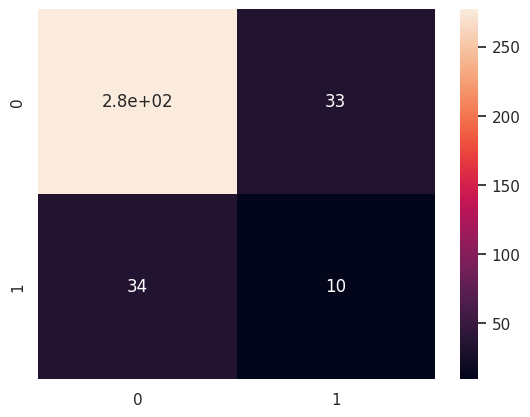

In [ ]:
dt_model =DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
acc_train1=format(accuracy_score(dt_model.predict(X_train), y_train),'.3f')
#acc_train2=log_model.predict(X_train)
print('The accuracy of the Support Vector Machine is(For training data) :',acc_train1)
#acc_test2=log_model.predict(X_test)
acc_test1=format(accuracy_score(dt_model.predict(X_test), y_test),'.3f')
print('The accuracy of the Support Vector Machine is(For test data) :',acc_test1)

y_pred_train= dt_model.predict(X_train)
y_pred_test= dt_model.predict(X_test)


precision_train1=format(precision_score(y_train,y_pred_train , average='macro'),'.3f')
precision_test1=format(precision_score(y_test, y_pred_test, average='macro'),'.3f')


recall_train1=format(recall_score(y_train,y_pred_train, average='macro'),'.3f')
recall_test1=format(recall_score(y_test,y_pred_test, average='macro'),'.3f')

f1_train1=format(f1_score(y_train,y_pred_train, average='macro'),'.3f')
f1_test1=format(f1_score(y_test,y_pred_test, average='macro'),'.3f')

roc_train1=roc_auc_score(y_train, y_pred_train)
roc_test1=roc_auc_score(y_test, y_pred_test)

CM=confusion_matrix(y_test,y_pred_test)
sns.heatmap(CM, annot=True)

log_loss_train1= log_loss(y_train, y_pred_train)
log_loss_test1= log_loss(y_test, y_pred_test)

mathew_train1 = matthews_corrcoef(y_train, y_pred_train)
mathew_test1 = matthews_corrcoef(y_test, y_pred_test)

r = comp_ev.shape[0]
comp_ev.loc[r] = ['Decision Tree',acc_train1,precision_train1,recall_train1,f1_train1,log_loss_train1,mathew_train1,roc_train1,acc_test1,precision_test1,recall_test1,f1_test1,roc_test1,log_loss_test1,mathew_test1]
#compare_evaluation.sort_values(by = 'Accuracy(test)', ascending=False)
comp_ev.sort_values(by = 'Accuracy(test)', ascending=False)

# KNN Classifier

The accuracy of the K Nearest Neighbour is(For training data) : 0.863
The accuracy of the K Nearest Neighbour is(For test data) : 0.876


,Model,Accuracy(train),Precision(train),Recall(train),F1_score(train),ROC(train),Log_Loss(train),mathew_corrcoef(train),Accuracy(test),Precision(test),Recall(test),F1_score(test),ROC(test),Log_Loss(test),mathew_corrcoef(test)
0,Logistic Regression,0.882,0.819,0.611,0.646,4.248158e+00,0.376460,0.611035,0.904,0.882,0.633,0.681,0.633138,3.461820,0.450749
1,Support Vector Machine,0.880,0.857,0.584,0.611,4.335749e+00,0.346718,0.584132,0.898,0.867,0.610,0.651,0.610411,3.665456,0.402573
3,K Nearest Neighbour,0.863,0.931,0.509,0.480,4.948886e+00,0.122465,0.508696,0.876,0.438,0.500,0.467,0.500000,4.480002,0.000000
2,Decision Tree,1.000,1.000,1.000,1.000,2.220446e-16,1.000000,1.000000,0.811,0.562,0.560,0.561,0.560411,6.821821,0.122021


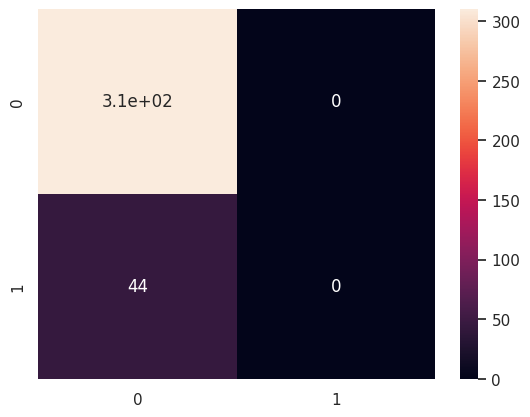

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_model=KNeighborsClassifier(n_neighbors=9);
knn_model.fit(X_train,y_train)
acc_train1=format(accuracy_score(knn_model.predict(X_train), y_train),'.3f')
#acc_train2=log_model.predict(X_train)
print('The accuracy of the K Nearest Neighbour is(For training data) :',acc_train1)
#acc_test2=log_model.predict(X_test)
acc_test1=format(accuracy_score(knn_model.predict(X_test), y_test),'.3f')
print('The accuracy of the K Nearest Neighbour is(For test data) :',acc_test1)

y_pred_train= knn_model.predict(X_train)
y_pred_test= knn_model.predict(X_test)


precision_train1=format(precision_score(y_train,y_pred_train , average='macro'),'.3f')
precision_test1=format(precision_score(y_test, y_pred_test, average='macro'),'.3f')


recall_train1=format(recall_score(y_train,y_pred_train, average='macro'),'.3f')
recall_test1=format(recall_score(y_test,y_pred_test, average='macro'),'.3f')

f1_train1=format(f1_score(y_train,y_pred_train, average='macro'),'.3f')
f1_test1=format(f1_score(y_test,y_pred_test, average='macro'),'.3f')

roc_train1=roc_auc_score(y_train, y_pred_train)
roc_test1=roc_auc_score(y_test, y_pred_test)

CM=confusion_matrix(y_test,y_pred_test)
sns.heatmap(CM, annot=True)

log_loss_train1= log_loss(y_train, y_pred_train)
log_loss_test1= log_loss(y_test, y_pred_test)

mathew_train1 = matthews_corrcoef(y_train, y_pred_train)
mathew_test1 = matthews_corrcoef(y_test, y_pred_test)

r = comp_ev.shape[0]
comp_ev.loc[r] = ['K Nearest Neighbour',acc_train1,precision_train1,recall_train1,f1_train1,log_loss_train1,mathew_train1,roc_train1,acc_test1,precision_test1,recall_test1,f1_test1,roc_test1,log_loss_test1,mathew_test1]
#compare_evaluation.sort_values(by = 'Accuracy(test)', ascending=False)
comp_ev.sort_values(by = 'Accuracy(test)', ascending=False)

# MLP Classifier

The accuracy of the Multi-Layer Perceptron is(For training data) : 0.906
The accuracy of the Multi-Layer Perceptronr is(For test data) : 0.910


,Model,Accuracy(train),Precision(train),Recall(train),F1_score(train),ROC(train),Log_Loss(train),mathew_corrcoef(train),Accuracy(test),Precision(test),Recall(test),F1_score(test),ROC(test),Log_Loss(test),mathew_corrcoef(test)
4,Multi-Layer Perceptron,0.906,0.901,0.683,0.738,3.372249e+00,0.542730,0.683425,0.910,0.874,0.666,0.717,0.665616,3.258183,0.497431
0,Logistic Regression,0.882,0.819,0.611,0.646,4.248158e+00,0.376460,0.611035,0.904,0.882,0.633,0.681,0.633138,3.461820,0.450749
1,Support Vector Machine,0.880,0.857,0.584,0.611,4.335749e+00,0.346718,0.584132,0.898,0.867,0.610,0.651,0.610411,3.665456,0.402573
3,K Nearest Neighbour,0.863,0.931,0.509,0.480,4.948886e+00,0.122465,0.508696,0.876,0.438,0.500,0.467,0.500000,4.480002,0.000000
2,Decision Tree,1.000,1.000,1.000,1.000,2.220446e-16,1.000000,1.000000,0.811,0.562,0.560,0.561,0.560411,6.821821,0.122021


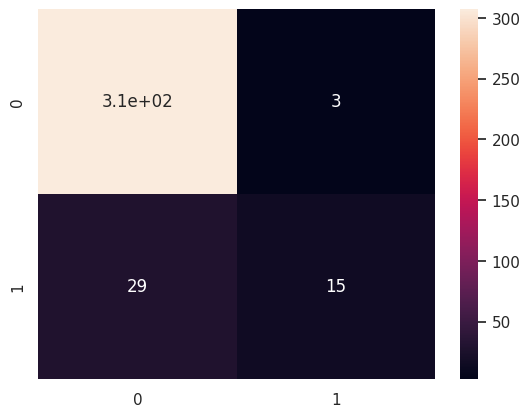

In [ ]:

mlp_model=MLPClassifier()
mlp_model.fit(X_train,y_train)
acc_train1=format(accuracy_score(mlp_model.predict(X_train), y_train),'.3f')
#acc_train2=log_model.predict(X_train)
print('The accuracy of the Multi-Layer Perceptron is(For training data) :',acc_train1)
#acc_test2=log_model.predict(X_test)
acc_test1=format(accuracy_score(mlp_model.predict(X_test), y_test),'.3f')
print('The accuracy of the Multi-Layer Perceptronr is(For test data) :',acc_test1)

y_pred_train= mlp_model.predict(X_train)
y_pred_test= mlp_model.predict(X_test)


precision_train1=format(precision_score(y_train,y_pred_train , average='macro'),'.3f')
precision_test1=format(precision_score(y_test, y_pred_test, average='macro'),'.3f')


recall_train1=format(recall_score(y_train,y_pred_train, average='macro'),'.3f')
recall_test1=format(recall_score(y_test,y_pred_test, average='macro'),'.3f')

f1_train1=format(f1_score(y_train,y_pred_train, average='macro'),'.3f')
f1_test1=format(f1_score(y_test,y_pred_test, average='macro'),'.3f')

roc_train1=roc_auc_score(y_train, y_pred_train)
roc_test1=roc_auc_score(y_test, y_pred_test)

CM=confusion_matrix(y_test,y_pred_test)
sns.heatmap(CM, annot=True)

log_loss_train1= log_loss(y_train, y_pred_train)
log_loss_test1= log_loss(y_test, y_pred_test)

mathew_train1 = matthews_corrcoef(y_train, y_pred_train)
mathew_test1 = matthews_corrcoef(y_test, y_pred_test)

r = comp_ev.shape[0]
comp_ev.loc[r] = ['Multi-Layer Perceptron',acc_train1,precision_train1,recall_train1,f1_train1,log_loss_train1,mathew_train1,roc_train1,acc_test1,precision_test1,recall_test1,f1_test1,roc_test1,log_loss_test1,mathew_test1]
#compare_evaluation.sort_values(by = 'Accuracy(test)', ascending=False)
comp_ev.sort_values(by = 'Accuracy(test)', ascending=False)

# Random Forest

The accuracy of the Random Forest Classifier  is(For training data) : 1.000
The accuracy of the Random Forest Classifier is(For test data) : 0.895


,Model,Accuracy(train),Precision(train),Recall(train),F1_score(train),ROC(train),Log_Loss(train),mathew_corrcoef(train),Accuracy(test),Precision(test),Recall(test),F1_score(test),ROC(test),Log_Loss(test),mathew_corrcoef(test)
4,Multi-Layer Perceptron,0.906,0.901,0.683,0.738,3.372249e+00,0.542730,0.683425,0.910,0.874,0.666,0.717,0.665616,3.258183,0.497431
0,Logistic Regression,0.882,0.819,0.611,0.646,4.248158e+00,0.376460,0.611035,0.904,0.882,0.633,0.681,0.633138,3.461820,0.450749
1,Support Vector Machine,0.880,0.857,0.584,0.611,4.335749e+00,0.346718,0.584132,0.898,0.867,0.610,0.651,0.610411,3.665456,0.402573
5,Random Forest Classifier,1.000,1.000,1.000,1.000,2.220446e-16,1.000000,1.000000,0.895,0.858,0.599,0.635,0.599047,3.767275,0.376647
3,K Nearest Neighbour,0.863,0.931,0.509,0.480,4.948886e+00,0.122465,0.508696,0.876,0.438,0.500,0.467,0.500000,4.480002,0.000000
2,Decision Tree,1.000,1.000,1.000,1.000,2.220446e-16,1.000000,1.000000,0.811,0.562,0.560,0.561,0.560411,6.821821,0.122021


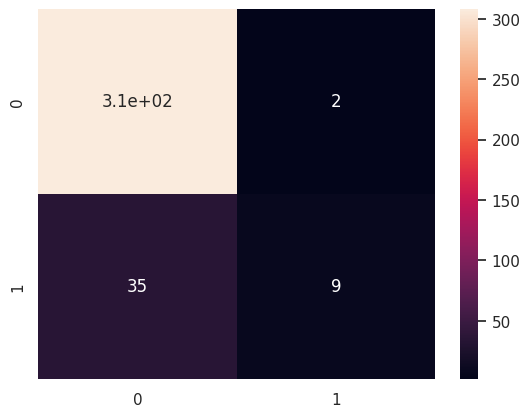

In [ ]:
rf_model =RandomForestClassifier(criterion='entropy',n_estimators=100)
rf_model.fit(X_train,y_train)
acc_train1=format(accuracy_score(rf_model.predict(X_train), y_train),'.3f')
#acc_train2=log_model.predict(X_train)
print('The accuracy of the Random Forest Classifier  is(For training data) :',acc_train1)
#acc_test2=log_model.predict(X_test)
acc_test1=format(accuracy_score(rf_model.predict(X_test), y_test),'.3f')
print('The accuracy of the Random Forest Classifier is(For test data) :',acc_test1)

y_pred_train= rf_model.predict(X_train)
y_pred_test= rf_model.predict(X_test)


precision_train1=format(precision_score(y_train, rf_model.predict(X_train), average='macro'),'.3f')
precision_test1=format(precision_score(y_test, rf_model.predict(X_test), average='macro'),'.3f')


recall_train1=format(recall_score(y_train,rf_model.predict(X_train), average='macro'),'.3f')
recall_test1=format(recall_score(y_test,rf_model.predict(X_test), average='macro'),'.3f')

f1_train1=format(f1_score(y_train,rf_model.predict(X_train), average='macro'),'.3f')
f1_test1=format(f1_score(y_test,rf_model.predict(X_test), average='macro'),'.3f')

roc_train1=roc_auc_score(y_train, y_pred_train)
roc_test1=roc_auc_score(y_test, y_pred_test)

CM=confusion_matrix(y_test,y_pred_test)
sns.heatmap(CM, annot=True)

log_loss_train1= log_loss(y_train, y_pred_train)
log_loss_test1= log_loss(y_test, y_pred_test)

mathew_train1 = matthews_corrcoef(y_train, y_pred_train)
mathew_test1 = matthews_corrcoef(y_test, y_pred_test)

r = comp_ev.shape[0]
comp_ev.loc[r] = ['Random Forest Classifier',acc_train1,precision_train1,recall_train1,f1_train1,log_loss_train1,mathew_train1,roc_train1,acc_test1,precision_test1,recall_test1,f1_test1,roc_test1,log_loss_test1,mathew_test1]
#compare_evaluation.sort_values(by = 'Accuracy(test)', ascending=False)
comp_ev.sort_values(by = 'Accuracy(test)', ascending=False)

# Extra Tree

The accuracy of the Extra Tree Classifier is(For training data) : 1.000
The accuracy of the Extra Tree Classifieris(For test data) : 0.890


,Model,Accuracy(train),Precision(train),Recall(train),F1_score(train),ROC(train),Log_Loss(train),mathew_corrcoef(train),Accuracy(test),Precision(test),Recall(test),F1_score(test),ROC(test),Log_Loss(test),mathew_corrcoef(test)
4,Multi-Layer Perceptron,0.906,0.901,0.683,0.738,3.372249e+00,0.542730,0.683425,0.910,0.874,0.666,0.717,0.665616,3.258183,0.497431
0,Logistic Regression,0.882,0.819,0.611,0.646,4.248158e+00,0.376460,0.611035,0.904,0.882,0.633,0.681,0.633138,3.461820,0.450749
1,Support Vector Machine,0.880,0.857,0.584,0.611,4.335749e+00,0.346718,0.584132,0.898,0.867,0.610,0.651,0.610411,3.665456,0.402573
5,Random Forest Classifier,1.000,1.000,1.000,1.000,2.220446e-16,1.000000,1.000000,0.895,0.858,0.599,0.635,0.599047,3.767275,0.376647
6,Extra Tree Classifier,1.000,1.000,1.000,1.000,2.220446e-16,1.000000,1.000000,0.890,0.874,0.567,0.588,0.566569,3.970911,0.315497
3,K Nearest Neighbour,0.863,0.931,0.509,0.480,4.948886e+00,0.122465,0.508696,0.876,0.438,0.500,0.467,0.500000,4.480002,0.000000
2,Decision Tree,1.000,1.000,1.000,1.000,2.220446e-16,1.000000,1.000000,0.811,0.562,0.560,0.561,0.560411,6.821821,0.122021


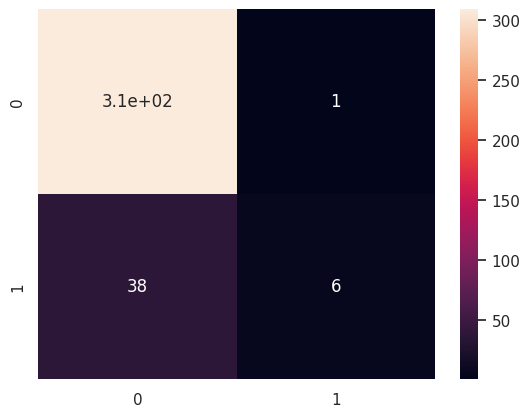

In [ ]:
et_model=ExtraTreesClassifier(n_estimators= 100)
et_model.fit(X_train,y_train)
acc_train1=format(accuracy_score(et_model.predict(X_train), y_train),'.3f')
#acc_train2=log_model.predict(X_train)
print('The accuracy of the Extra Tree Classifier is(For training data) :',acc_train1)
#acc_test2=log_model.predict(X_test)
acc_test1=format(accuracy_score(et_model.predict(X_test), y_test),'.3f')
print('The accuracy of the Extra Tree Classifieris(For test data) :',acc_test1)

y_pred_train= et_model.predict(X_train)
y_pred_test= et_model.predict(X_test)


precision_train1=format(precision_score(y_train,y_pred_train , average='macro'),'.3f')
precision_test1=format(precision_score(y_test, y_pred_test, average='macro'),'.3f')


recall_train1=format(recall_score(y_train,y_pred_train, average='macro'),'.3f')
recall_test1=format(recall_score(y_test,y_pred_test, average='macro'),'.3f')

f1_train1=format(f1_score(y_train,y_pred_train, average='macro'),'.3f')
f1_test1=format(f1_score(y_test,y_pred_test, average='macro'),'.3f')

roc_train1=roc_auc_score(y_train, y_pred_train)
roc_test1=roc_auc_score(y_test, y_pred_test)

CM=confusion_matrix(y_test,y_pred_test)
sns.heatmap(CM, annot=True)

log_loss_train1= log_loss(y_train, y_pred_train)
log_loss_test1= log_loss(y_test, y_pred_test)

mathew_train1 = matthews_corrcoef(y_train, y_pred_train)
mathew_test1 = matthews_corrcoef(y_test, y_pred_test)

r = comp_ev.shape[0]
comp_ev.loc[r] = ['Extra Tree Classifier',acc_train1,precision_train1,recall_train1,f1_train1,log_loss_train1,mathew_train1,roc_train1,acc_test1,precision_test1,recall_test1,f1_test1,roc_test1,log_loss_test1,mathew_test1]
#compare_evaluation.sort_values(by = 'Accuracy(test)', ascending=False)
comp_ev.sort_values(by = 'Accuracy(test)', ascending=False)

# Stochastic Gradient Descent

The accuracy of the Stochastic Gradient Descent is(For training data) : 0.896
The accuracy of the Stochastic Gradient Descent(For test data) : 0.893


,Model,Accuracy(train),Precision(train),Recall(train),F1_score(train),ROC(train),Log_Loss(train),mathew_corrcoef(train),Accuracy(test),Precision(test),Recall(test),F1_score(test),ROC(test),Log_Loss(test),mathew_corrcoef(test)
4,Multi-Layer Perceptron,0.906,0.901,0.683,0.738,3.372249e+00,0.542730,0.683425,0.910,0.874,0.666,0.717,0.665616,3.258183,0.497431
0,Logistic Regression,0.882,0.819,0.611,0.646,4.248158e+00,0.376460,0.611035,0.904,0.882,0.633,0.681,0.633138,3.461820,0.450749
1,Support Vector Machine,0.880,0.857,0.584,0.611,4.335749e+00,0.346718,0.584132,0.898,0.867,0.610,0.651,0.610411,3.665456,0.402573
5,Random Forest Classifier,1.000,1.000,1.000,1.000,2.220446e-16,1.000000,1.000000,0.895,0.858,0.599,0.635,0.599047,3.767275,0.376647
7,Stochastic Gradient Descent,0.896,0.839,0.670,0.715,3.766408e+00,0.479639,0.669786,0.893,0.765,0.666,0.699,0.665689,3.869093,0.419090
6,Extra Tree Classifier,1.000,1.000,1.000,1.000,2.220446e-16,1.000000,1.000000,0.890,0.874,0.567,0.588,0.566569,3.970911,0.315497
3,K Nearest Neighbour,0.863,0.931,0.509,0.480,4.948886e+00,0.122465,0.508696,0.876,0.438,0.500,0.467,0.500000,4.480002,0.000000
2,Decision Tree,1.000,1.000,1.000,1.000,2.220446e-16,1.000000,1.000000,0.811,0.562,0.560,0.561,0.560411,6.821821,0.122021


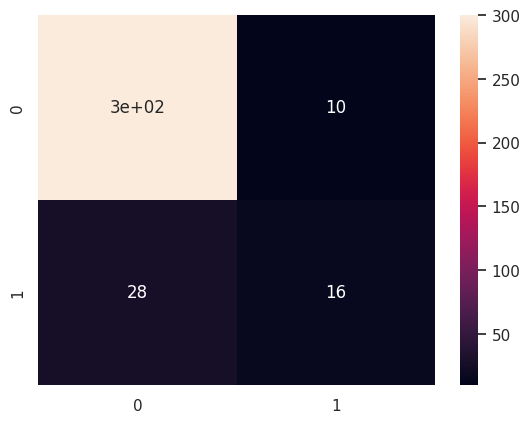

In [ ]:
sgd_model=SGDClassifier(max_iter=1000, tol=1e-4)
sgd_model.fit(X_train,y_train)
acc_train1=format(accuracy_score(sgd_model.predict(X_train), y_train),'.3f')
#acc_train2=log_model.predict(X_train)
print('The accuracy of the Stochastic Gradient Descent is(For training data) :',acc_train1)
#acc_test2=log_model.predict(X_test)
acc_test1=format(accuracy_score(sgd_model.predict(X_test), y_test),'.3f')
print('The accuracy of the Stochastic Gradient Descent(For test data) :',acc_test1)

y_pred_train= sgd_model.predict(X_train)
y_pred_test= sgd_model.predict(X_test)


precision_train1=format(precision_score(y_train,y_pred_train , average='macro'),'.3f')
precision_test1=format(precision_score(y_test, y_pred_test, average='macro'),'.3f')


recall_train1=format(recall_score(y_train,y_pred_train, average='macro'),'.3f')
recall_test1=format(recall_score(y_test,y_pred_test, average='macro'),'.3f')

f1_train1=format(f1_score(y_train,y_pred_train, average='macro'),'.3f')
f1_test1=format(f1_score(y_test,y_pred_test, average='macro'),'.3f')

roc_train1=roc_auc_score(y_train, y_pred_train)
roc_test1=roc_auc_score(y_test, y_pred_test)

CM=confusion_matrix(y_test,y_pred_test)
sns.heatmap(CM, annot=True)

log_loss_train1= log_loss(y_train, y_pred_train)
log_loss_test1= log_loss(y_test, y_pred_test)

mathew_train1 = matthews_corrcoef(y_train, y_pred_train)
mathew_test1 = matthews_corrcoef(y_test, y_pred_test)

r = comp_ev.shape[0]
comp_ev.loc[r] = ['Stochastic Gradient Descent',acc_train1,precision_train1,recall_train1,f1_train1,log_loss_train1,mathew_train1,roc_train1,acc_test1,precision_test1,recall_test1,f1_test1,roc_test1,log_loss_test1,mathew_test1]
#compare_evaluation.sort_values(by = 'Accuracy(test)', ascending=False)
comp_ev.sort_values(by = 'Accuracy(test)', ascending=False)

# Gradient Descent

The accuracy of the Gradient Boosting is(For training data) : 0.966
The accuracy of the Gradient Boosting(For test data) : 0.898


,Model,Accuracy(train),Precision(train),Recall(train),F1_score(train),ROC(train),Log_Loss(train),mathew_corrcoef(train),Accuracy(test),Precision(test),Recall(test),F1_score(test),ROC(test),Log_Loss(test),mathew_corrcoef(test)
4,Multi-Layer Perceptron,0.906,0.901,0.683,0.738,3.372249e+00,0.542730,0.683425,0.910,0.874,0.666,0.717,0.665616,3.258183,0.497431
0,Logistic Regression,0.882,0.819,0.611,0.646,4.248158e+00,0.376460,0.611035,0.904,0.882,0.633,0.681,0.633138,3.461820,0.450749
1,Support Vector Machine,0.880,0.857,0.584,0.611,4.335749e+00,0.346718,0.584132,0.898,0.867,0.610,0.651,0.610411,3.665456,0.402573
8,Gradient Boosting,0.966,0.981,0.878,0.921,1.226273e+00,0.853077,0.878261,0.898,0.828,0.630,0.672,0.629912,3.665456,0.412637
5,Random Forest Classifier,1.000,1.000,1.000,1.000,2.220446e-16,1.000000,1.000000,0.895,0.858,0.599,0.635,0.599047,3.767275,0.376647
7,Stochastic Gradient Descent,0.896,0.839,0.670,0.715,3.766408e+00,0.479639,0.669786,0.893,0.765,0.666,0.699,0.665689,3.869093,0.419090
6,Extra Tree Classifier,1.000,1.000,1.000,1.000,2.220446e-16,1.000000,1.000000,0.890,0.874,0.567,0.588,0.566569,3.970911,0.315497
3,K Nearest Neighbour,0.863,0.931,0.509,0.480,4.948886e+00,0.122465,0.508696,0.876,0.438,0.500,0.467,0.500000,4.480002,0.000000
2,Decision Tree,1.000,1.000,1.000,1.000,2.220446e-16,1.000000,1.000000,0.811,0.562,0.560,0.561,0.560411,6.821821,0.122021


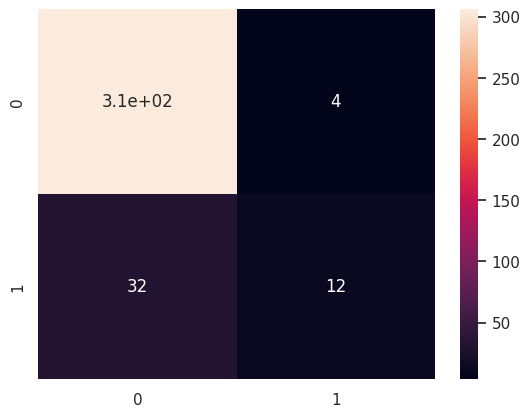

In [ ]:
gb_model=GradientBoostingClassifier(n_estimators=100,max_features='sqrt')
gb_model.fit(X_train,y_train)
acc_train1=format(accuracy_score(gb_model.predict(X_train), y_train),'.3f')
#acc_train2=log_model.predict(X_train)
print('The accuracy of the Gradient Boosting is(For training data) :',acc_train1)
#acc_test2=log_model.predict(X_test)
acc_test1=format(accuracy_score(gb_model.predict(X_test), y_test),'.3f')
print('The accuracy of the Gradient Boosting(For test data) :',acc_test1)

y_pred_train= gb_model.predict(X_train)
y_pred_test= gb_model.predict(X_test)


precision_train1=format(precision_score(y_train,y_pred_train , average='macro'),'.3f')
precision_test1=format(precision_score(y_test, y_pred_test, average='macro'),'.3f')


recall_train1=format(recall_score(y_train,y_pred_train, average='macro'),'.3f')
recall_test1=format(recall_score(y_test,y_pred_test, average='macro'),'.3f')

f1_train1=format(f1_score(y_train,y_pred_train, average='macro'),'.3f')
f1_test1=format(f1_score(y_test,y_pred_test, average='macro'),'.3f')

roc_train1=roc_auc_score(y_train, y_pred_train)
roc_test1=roc_auc_score(y_test, y_pred_test)

CM=confusion_matrix(y_test,y_pred_test)
sns.heatmap(CM, annot=True)

log_loss_train1= log_loss(y_train, y_pred_train)
log_loss_test1= log_loss(y_test, y_pred_test)

mathew_train1 = matthews_corrcoef(y_train, y_pred_train)
mathew_test1 = matthews_corrcoef(y_test, y_pred_test)

r = comp_ev.shape[0]
comp_ev.loc[r] = ['Gradient Boosting',acc_train1,precision_train1,recall_train1,f1_train1,log_loss_train1,mathew_train1,roc_train1,acc_test1,precision_test1,recall_test1,f1_test1,roc_test1,log_loss_test1,mathew_test1]
#compare_evaluation.sort_values(by = 'Accuracy(test)', ascending=False)
comp_ev.sort_values(by = 'Accuracy(test)', ascending=False)

# Adaboost classifier

The accuracy of the Adaptive Boosting is(For training data) : 0.936
The accuracy of the Adaptive Boosting(For test data) : 0.862


,Model,Accuracy(train),Precision(train),Recall(train),F1_score(train),ROC(train),Log_Loss(train),mathew_corrcoef(train),Accuracy(test),Precision(test),Recall(test),F1_score(test),ROC(test),Log_Loss(test),mathew_corrcoef(test)
4,Multi-Layer Perceptron,0.906,0.901,0.683,0.738,3.372249e+00,0.542730,0.683425,0.910,0.874,0.666,0.717,0.665616,3.258183,0.497431
0,Logistic Regression,0.882,0.819,0.611,0.646,4.248158e+00,0.376460,0.611035,0.904,0.882,0.633,0.681,0.633138,3.461820,0.450749
1,Support Vector Machine,0.880,0.857,0.584,0.611,4.335749e+00,0.346718,0.584132,0.898,0.867,0.610,0.651,0.610411,3.665456,0.402573
8,Gradient Boosting,0.966,0.981,0.878,0.921,1.226273e+00,0.853077,0.878261,0.898,0.828,0.630,0.672,0.629912,3.665456,0.412637
5,Random Forest Classifier,1.000,1.000,1.000,1.000,2.220446e-16,1.000000,1.000000,0.895,0.858,0.599,0.635,0.599047,3.767275,0.376647
7,Stochastic Gradient Descent,0.896,0.839,0.670,0.715,3.766408e+00,0.479639,0.669786,0.893,0.765,0.666,0.699,0.665689,3.869093,0.419090
6,Extra Tree Classifier,1.000,1.000,1.000,1.000,2.220446e-16,1.000000,1.000000,0.890,0.874,0.567,0.588,0.566569,3.970911,0.315497
3,K Nearest Neighbour,0.863,0.931,0.509,0.480,4.948886e+00,0.122465,0.508696,0.876,0.438,0.500,0.467,0.500000,4.480002,0.000000
9,Adaptive Boosting,0.936,0.928,0.791,0.842,2.321159e+00,0.706400,0.791415,0.862,0.665,0.628,0.643,0.628446,4.989093,0.291506
2,Decision Tree,1.000,1.000,1.000,1.000,2.220446e-16,1.000000,1.000000,0.811,0.562,0.560,0.561,0.560411,6.821821,0.122021


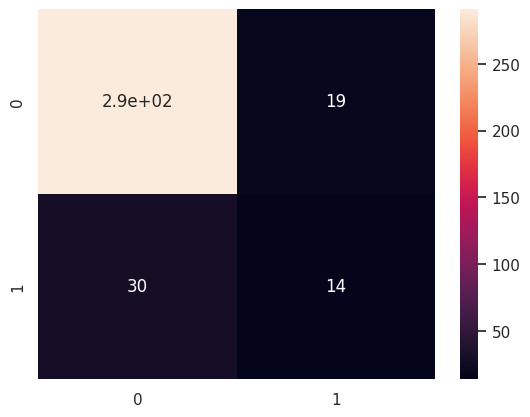

In [ ]:

ada_model=AdaBoostClassifier()
ada_model.fit(X_train,y_train)
acc_train1=format(accuracy_score(ada_model.predict(X_train), y_train),'.3f')
#acc_train2=log_model.predict(X_train)
print('The accuracy of the Adaptive Boosting is(For training data) :',acc_train1)
#acc_test2=log_model.predict(X_test)
acc_test1=format(accuracy_score(ada_model.predict(X_test), y_test),'.3f')
print('The accuracy of the Adaptive Boosting(For test data) :',acc_test1)

y_pred_train= ada_model.predict(X_train)
y_pred_test= ada_model.predict(X_test)


precision_train1=format(precision_score(y_train,y_pred_train , average='macro'),'.3f')
precision_test1=format(precision_score(y_test, y_pred_test, average='macro'),'.3f')


recall_train1=format(recall_score(y_train,y_pred_train, average='macro'),'.3f')
recall_test1=format(recall_score(y_test,y_pred_test, average='macro'),'.3f')

f1_train1=format(f1_score(y_train,y_pred_train, average='macro'),'.3f')
f1_test1=format(f1_score(y_test,y_pred_test, average='macro'),'.3f')

roc_train1=roc_auc_score(y_train, y_pred_train)
roc_test1=roc_auc_score(y_test, y_pred_test)

CM=confusion_matrix(y_test,y_pred_test)
sns.heatmap(CM, annot=True)

log_loss_train1= log_loss(y_train, y_pred_train)
log_loss_test1= log_loss(y_test, y_pred_test)

mathew_train1 = matthews_corrcoef(y_train, y_pred_train)
mathew_test1 = matthews_corrcoef(y_test, y_pred_test)

r = comp_ev.shape[0]
comp_ev.loc[r] = ['Adaptive Boosting',acc_train1,precision_train1,recall_train1,f1_train1,log_loss_train1,mathew_train1,roc_train1,acc_test1,precision_test1,recall_test1,f1_test1,roc_test1,log_loss_test1,mathew_test1]
#compare_evaluation.sort_values(by = 'Accuracy(test)', ascending=False)
comp_ev.sort_values(by = 'Accuracy(test)', ascending=False)

# XGBoost

The accuracy of the extreme Gradient Boosting is(For training data) : 1.000
The accuracy of the extreme Gradient Boosting(For test data) : 0.879


,Model,Accuracy(train),Precision(train),Recall(train),F1_score(train),ROC(train),Log_Loss(train),mathew_corrcoef(train),Accuracy(test),Precision(test),Recall(test),F1_score(test),ROC(test),Log_Loss(test),mathew_corrcoef(test)
4,Multi-Layer Perceptron,0.906,0.901,0.683,0.738,3.372249e+00,0.542730,0.683425,0.910,0.874,0.666,0.717,0.665616,3.258183,0.497431
0,Logistic Regression,0.882,0.819,0.611,0.646,4.248158e+00,0.376460,0.611035,0.904,0.882,0.633,0.681,0.633138,3.461820,0.450749
1,Support Vector Machine,0.880,0.857,0.584,0.611,4.335749e+00,0.346718,0.584132,0.898,0.867,0.610,0.651,0.610411,3.665456,0.402573
8,Gradient Boosting,0.966,0.981,0.878,0.921,1.226273e+00,0.853077,0.878261,0.898,0.828,0.630,0.672,0.629912,3.665456,0.412637
5,Random Forest Classifier,1.000,1.000,1.000,1.000,2.220446e-16,1.000000,1.000000,0.895,0.858,0.599,0.635,0.599047,3.767275,0.376647
7,Stochastic Gradient Descent,0.896,0.839,0.670,0.715,3.766408e+00,0.479639,0.669786,0.893,0.765,0.666,0.699,0.665689,3.869093,0.419090
6,Extra Tree Classifier,1.000,1.000,1.000,1.000,2.220446e-16,1.000000,1.000000,0.890,0.874,0.567,0.588,0.566569,3.970911,0.315497
10,extreme Gradient Boosting,1.000,1.000,1.000,1.000,2.220446e-16,1.000000,1.000000,0.879,0.712,0.609,0.636,0.608871,4.378184,0.304101
3,K Nearest Neighbour,0.863,0.931,0.509,0.480,4.948886e+00,0.122465,0.508696,0.876,0.438,0.500,0.467,0.500000,4.480002,0.000000
9,Adaptive Boosting,0.936,0.928,0.791,0.842,2.321159e+00,0.706400,0.791415,0.862,0.665,0.628,0.643,0.628446,4.989093,0.291506


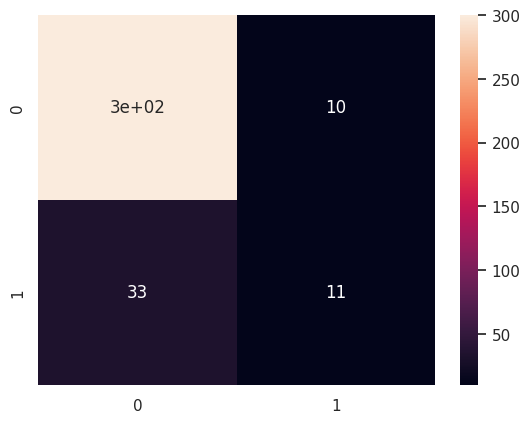

In [ ]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train,y_train)
acc_train1=format(accuracy_score(xgb_model.predict(X_train), y_train),'.3f')
#acc_train2=log_model.predict(X_train)
print('The accuracy of the extreme Gradient Boosting is(For training data) :',acc_train1)
#acc_test2=log_model.predict(X_test)
acc_test1=format(accuracy_score(xgb_model.predict(X_test), y_test),'.3f')
print('The accuracy of the extreme Gradient Boosting(For test data) :',acc_test1)

y_pred_train= xgb_model.predict(X_train)
y_pred_test= xgb_model.predict(X_test)


precision_train1=format(precision_score(y_train,y_pred_train , average='macro'),'.3f')
precision_test1=format(precision_score(y_test, y_pred_test, average='macro'),'.3f')


recall_train1=format(recall_score(y_train,y_pred_train, average='macro'),'.3f')
recall_test1=format(recall_score(y_test,y_pred_test, average='macro'),'.3f')

f1_train1=format(f1_score(y_train,y_pred_train, average='macro'),'.3f')
f1_test1=format(f1_score(y_test,y_pred_test, average='macro'),'.3f')

roc_train1=roc_auc_score(y_train, y_pred_train)
roc_test1=roc_auc_score(y_test, y_pred_test)

CM=confusion_matrix(y_test,y_pred_test)
sns.heatmap(CM, annot=True)

log_loss_train1= log_loss(y_train, y_pred_train)
log_loss_test1= log_loss(y_test, y_pred_test)

mathew_train1 = matthews_corrcoef(y_train, y_pred_train)
mathew_test1 = matthews_corrcoef(y_test, y_pred_test)

r = comp_ev.shape[0]
comp_ev.loc[r] = ['extreme Gradient Boosting',acc_train1,precision_train1,recall_train1,f1_train1,log_loss_train1,mathew_train1,roc_train1,acc_test1,precision_test1,recall_test1,f1_test1,roc_test1,log_loss_test1,mathew_test1]
#compare_evaluation.sort_values(by = 'Accuracy(test)', ascending=False)
comp_ev.sort_values(by = 'Accuracy(test)', ascending=False)

# ROC curve

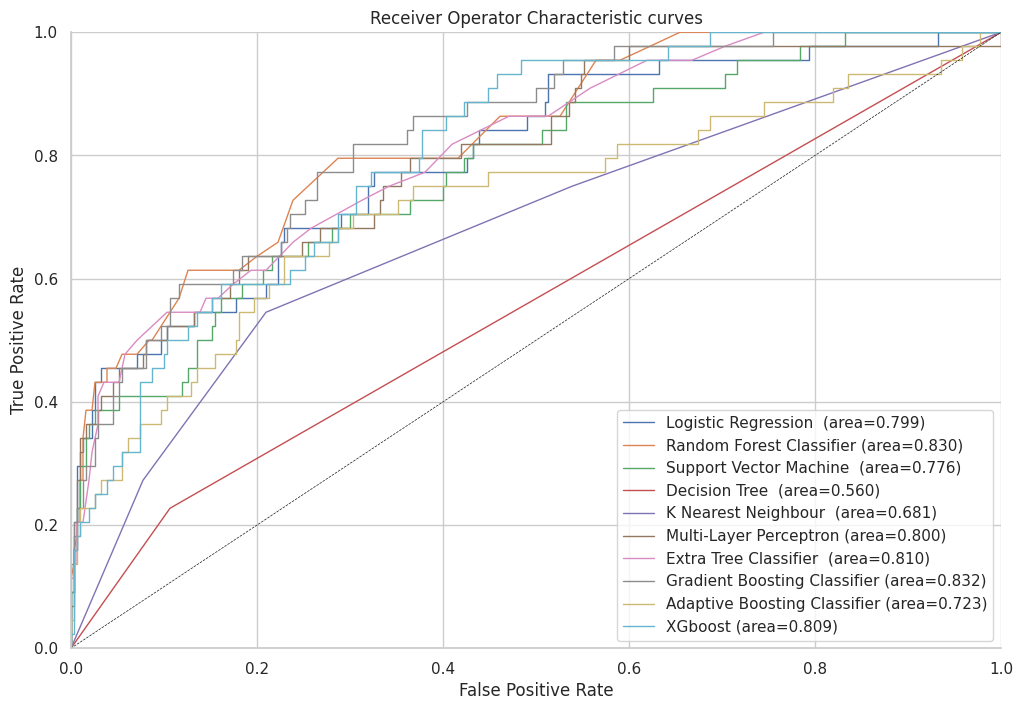

In [ ]:
def roc_auc_plot(y_true, y_proba, label=' ', l='-', lw=1.0):
    from sklearn.metrics import roc_curve, roc_auc_score
    fpr, tpr, _ = roc_curve(y_true, y_proba[:,1])
    ax.plot(fpr, tpr, linestyle=l, linewidth=lw,
            label="%s (area=%.3f)"%(label,roc_auc_score(y_true, y_proba[:,1])))

f, ax = plt.subplots(figsize=(12,8))

roc_auc_plot(y_test,log_model.predict_proba(X_test),label='Logistic Regression ',l='-')
roc_auc_plot(y_test,rf_model.predict_proba(X_test),label='Random Forest Classifier',l='-')
roc_auc_plot(y_test,svm_model.predict_proba(X_test),label='Support Vector Machine ',l='-')
roc_auc_plot(y_test,dt_model.predict_proba(X_test),label='Decision Tree ',l='-')
roc_auc_plot(y_test,knn_model.predict_proba(X_test),label='K Nearest Neighbour ',l='-')
roc_auc_plot(y_test,mlp_model.predict_proba(X_test),label='Multi-Layer Perceptron',l='-')
roc_auc_plot(y_test,et_model.predict_proba(X_test),label='Extra Tree Classifier ',l='-')
#roc_auc_plot(y_test,sgd_model.predict_proba(X_test),label='Stochastic Gradient Descent',l='-')
roc_auc_plot(y_test,gb_model.predict_proba(X_test),label='Gradient Boosting Classifier',l='-')
roc_auc_plot(y_test,ada_model.predict_proba(X_test),label='Adaptive Boosting Classifier',l='-')
roc_auc_plot(y_test,xgb_model.predict_proba(X_test),label='XGboost',l='-')

ax.plot([0,1], [0,1], color='k', linewidth=0.5, linestyle='--',
        )
ax.legend(loc="lower right")
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Receiver Operator Characteristic curves')
sns.despine()

# Precision-Recall Curve

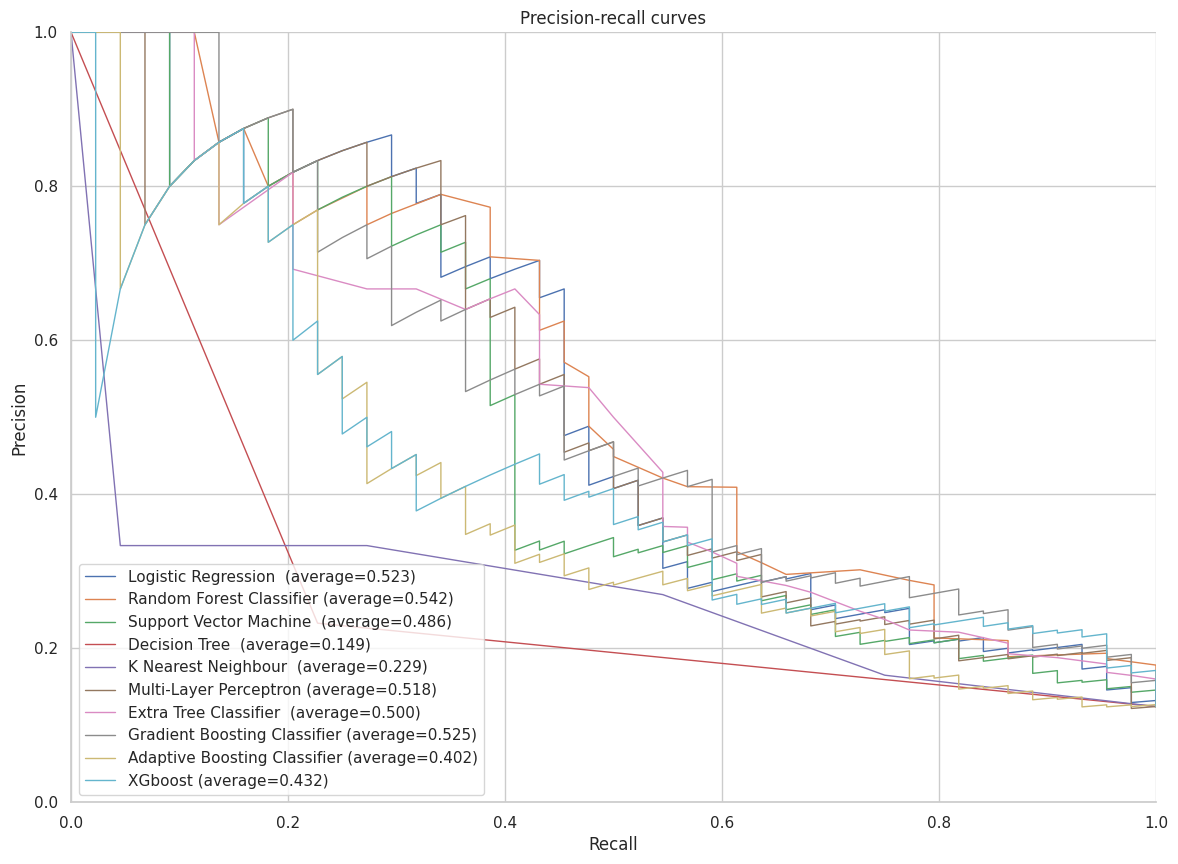

In [ ]:
def precision_recall_plot(y_true, y_proba, label=' ', l='-', lw=1.0):
    from sklearn.metrics import precision_recall_curve, average_precision_score
    precision, recall, _ = precision_recall_curve(y_test,
                                                  y_proba[:,1])
    average_precision = average_precision_score(y_test, y_proba[:,1],
                                                     average="micro")
    ax.plot(recall, precision, label='%s (average=%.3f)'%(label,average_precision),
            linestyle=l, linewidth=lw)

f, ax = plt.subplots(figsize=(14,10))

#precision_recall_plot(y_test,rf_ent.predict_proba(X_test),label='Random Forest Classifier ',l='-')
#precision_recall_plot(y_test,et_100.predict_proba(X_test),label='Extra Tree Classifier ',l='-')
#precision_recall_plot(y_test,xgb.predict_proba(X_test),label='XGboost',l='-')

precision_recall_plot(y_test,log_model.predict_proba(X_test),label='Logistic Regression ',l='-')
precision_recall_plot(y_test,rf_model.predict_proba(X_test),label='Random Forest Classifier',l='-')
precision_recall_plot(y_test,svm_model.predict_proba(X_test),label='Support Vector Machine ',l='-')
precision_recall_plot(y_test,dt_model.predict_proba(X_test),label='Decision Tree ',l='-')
precision_recall_plot(y_test,knn_model.predict_proba(X_test),label='K Nearest Neighbour ',l='-')
precision_recall_plot(y_test,mlp_model.predict_proba(X_test),label='Multi-Layer Perceptron',l='-')
precision_recall_plot(y_test,et_model.predict_proba(X_test),label='Extra Tree Classifier ',l='-')
#roc_auc_plot(y_test,sgd_model.predict_proba(X_test),label='Stochastic Gradient Descent',l='-')
precision_recall_plot(y_test,gb_model.predict_proba(X_test),label='Gradient Boosting Classifier',l='-')
precision_recall_plot(y_test,ada_model.predict_proba(X_test),label='Adaptive Boosting Classifier',l='-')
precision_recall_plot(y_test,xgb_model.predict_proba(X_test),label='XGboost',l='-')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.legend(loc="lower left")
ax.grid(True)
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Precision-recall curves')
sns.despine()

# Feature Selection and Prioritization

In [ ]:
X.shape

(1177, 47)

# Principal Component Analysis (PCA)

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

x_train = StandardScaler().fit_transform(X_train)
x_test = StandardScaler().fit_transform(X_test)

pca1 = PCA()
pca_selector= pca1.fit(x_train)


#explained_variance_ratio = pca1.explained_variance_ratio_
#pc_vs_variance = np.cumsum(pca1.explained_variance_ratio_)
#plt.plot(pc_vs_variance)
#plt.xlabel('Number of Components')
#plt.ylabel('% Explained Variance')
#plt.title('PCA Explained Variance vs. Number of Components')
#plt.show()

pc_df = pd.DataFrame(pca1.components_,columns=X.columns)
top_pc = pc_df[0:1]
display(top_pc)

,age,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,deficiencyanemias,depression,hyperlipidemia,Renal failure,COPD,heart rate,Systolic blood pressure,Diastolic blood pressure,Respiratory rate,temperature,SP O2,Urine output,hematocrit,RBC,MCH,MCHC,MCV,RDW,Leucocyte,Platelets,Neutrophils,Basophils,Lymphocyte,PT,INR,NT-proBNP,Creatine kinase,Creatinine,Urea nitrogen,glucose,Blood potassium,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
0,-0.11297,0.165611,-0.034929,-0.147504,-0.0281,-0.067665,-0.101963,0.033155,-0.053699,-0.208398,0.066781,0.051046,0.100245,0.149001,0.041685,0.10417,-0.142515,0.210112,0.216374,0.200046,0.007086,0.017706,-0.001864,-0.146551,-0.093719,0.037805,-0.073541,0.102797,0.101091,-0.170975,-0.167832,-0.258457,-0.020258,-0.273128,-0.315075,-0.01245,-0.151191,0.08612,0.101156,-0.097878,-0.297106,-0.110407,0.070725,0.302058,-0.119797,0.213946,0.081571


In [ ]:
new_top_pc = top_pc.abs()
features =[]

for i in range(0,30):
  features.append(new_top_pc.idxmax(axis=1).tolist())
  new_top_pc = new_top_pc.drop(columns=features[i])

df_features = pd.DataFrame(features,columns=['Top features'])
#display(df_features)
#features

import itertools
pca_features= list(itertools.chain.from_iterable(features))
pca_features

['Urea nitrogen',
 'Bicarbonate',
 'Anion gap',
 'Creatinine',
 'NT-proBNP',
 'hematocrit',
 'PCO2',
 'Urine output',
 'Renal failure',
 'RBC',
 'PT',
 'INR',
 'BMI',
 'Blood potassium',
 'Diastolic blood pressure',
 'atrialfibrillation',
 'RDW',
 'SP O2',
 'Lactic acid',
 'age',
 'Magnesium ion',
 'temperature',
 'Basophils',
 'deficiencyanemias',
 'Blood calcium',
 'Lymphocyte',
 'Systolic blood pressure',
 'Chloride',
 'Leucocyte',
 'Blood sodium']

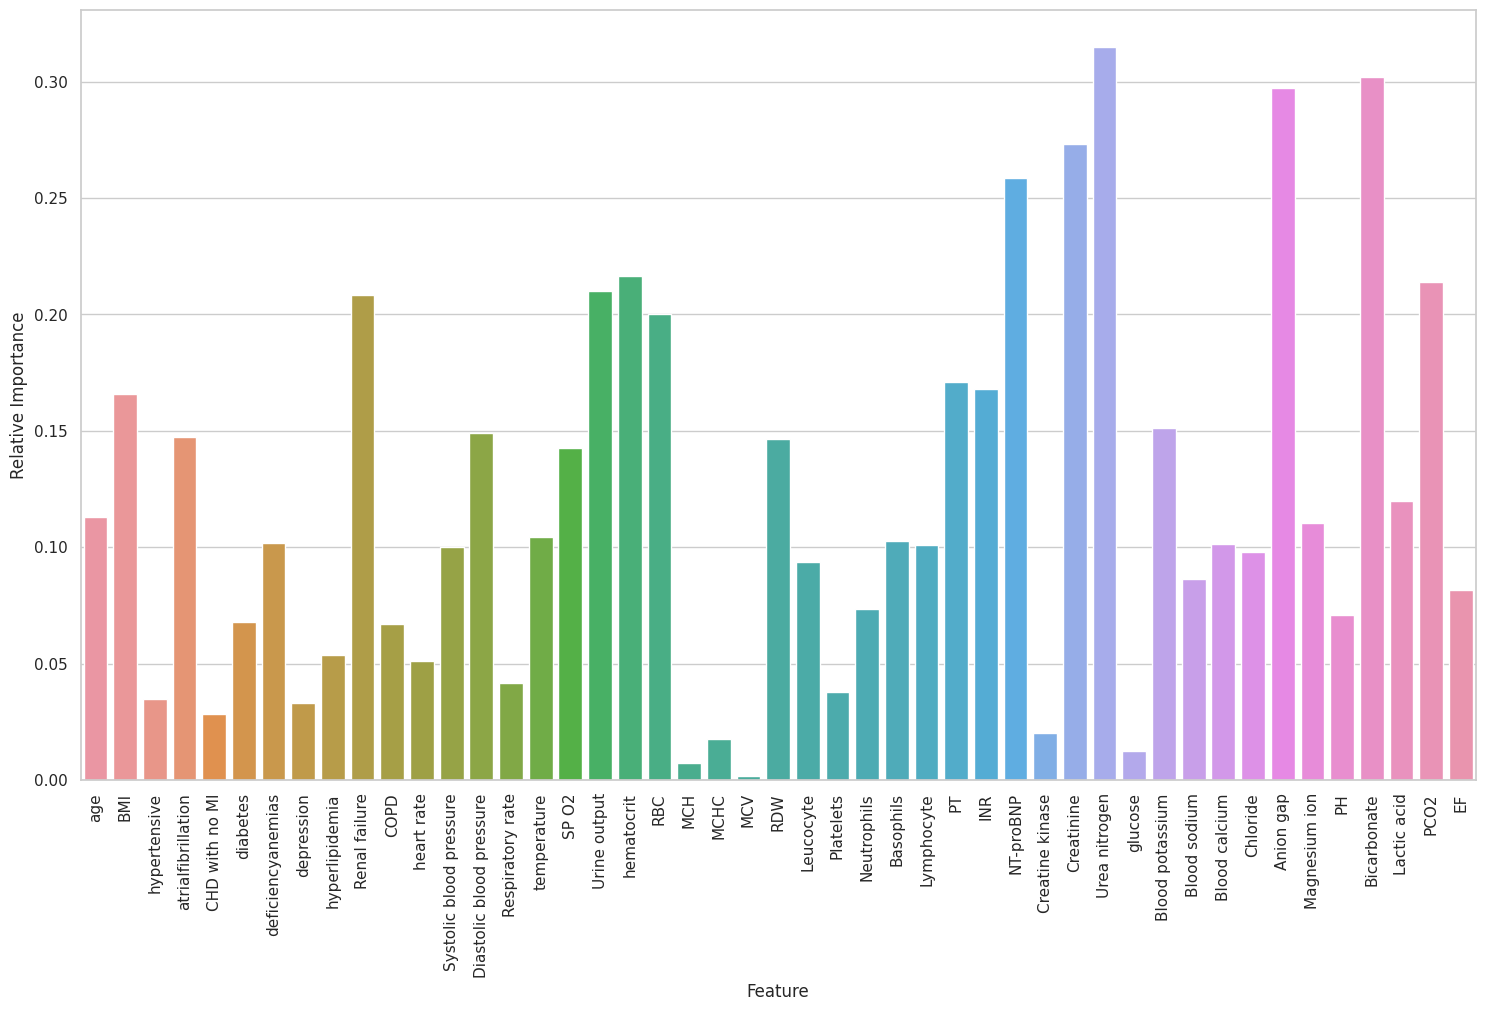

In [ ]:
top_pc = top_pc.abs()
list_magnitude = top_pc.loc[0, :].values.tolist()
labels = top_pc.columns.tolist()
feature_importance_df = pd.DataFrame({'Feature': labels, 'Relative Importance': list_magnitude})
#feature_importance_df = feature_importance_df.nlargest(10, 'Relative Importance')

fig, ax =plt.subplots(figsize=(18,10))
sns.barplot(x='Feature', y='Relative Importance', data=feature_importance_df.reset_index())
plt.xticks(rotation=90)
plt.show()

# FS with Pearson Corr